<a href="https://colab.research.google.com/github/JuanMa312/Challenge-Telecom-X-analisis-de-evasion-de-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

# Cargar los datos directamente desde la API utilizando Python
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# url = 'TelecomX_Data.json'

In [2]:
try:
    # Convertir los datos a un DataFrame de Pandas
    Datos = pd.read_json(url)
    print(f"✅ Datos cargados correctamente | Dimensiones(x): {len(Datos)} registros y: {len(Datos.columns)} columnas")
except Exception as e:
    print(f"❌ Error en la carga de datos | Detalle: {str(e).capitalize()}")
    print("🔍 Solución: Verifique 1) URL válida 2) Conexión a internet 3) Formato JSON")

✅ Datos cargados correctamente | Dimensiones(x): 7267 registros y: 6 columnas


In [3]:
Datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# Datos anidados
# Columnas [customer, phone, internet, account]
Datos_Norm_customer = pd.json_normalize(Datos['customer'])
Datos_Norm_phone = pd.json_normalize(Datos['phone'])
Datos_Norm_internet = pd.json_normalize(Datos['internet'])
Datos_Norm_account = pd.json_normalize(Datos['account'])

In [5]:
#Forma de concatenar Series
#Nuevo DF
Datos_Norm = pd.concat([Datos['customerID'], Datos['Churn'], Datos_Norm_customer, Datos_Norm_phone,Datos_Norm_internet, Datos_Norm_account], axis=1)
Datos_Norm.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [6]:
# Anterior df
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
# Anterior df
Datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [8]:
#Nuevo df
Datos_Norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
Datos_Norm.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [10]:
print(f"Datos_Norm contiene. Filas: {len(Datos_Norm)}, Columnas: {len(Datos_Norm.columns)}")


Datos_Norm contiene. Filas: 7267, Columnas: 21


In [11]:
#Verificando si hay duplicados
duplicados = Datos_Norm.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

Numero de lineas duplicadas: 0


In [12]:
for col in Datos_Norm.columns:
        vacios = (Datos_Norm[col] == "").sum()  # Cuenta los valores exactamente iguales a ""
        print(f" • {col}: {vacios} valores vacíos ('')")
        #Si el numero de valores vacios es mayor a 0, muestra ejemplos de los datos vacios
        if vacios > 0:
            print(f"Las Filas tienen datos vacios son: ", Datos_Norm[Datos_Norm[col] == ""][col].sample(5))  # Muestra ejemplos si hay vacíos
            print('-' * 50)

 • customerID: 0 valores vacíos ('')
 • Churn: 224 valores vacíos ('')
Las Filas tienen datos vacios son:  2945    
2613    
4778    
5823    
5255    
Name: Churn, dtype: object
--------------------------------------------------
 • gender: 0 valores vacíos ('')
 • SeniorCitizen: 0 valores vacíos ('')
 • Partner: 0 valores vacíos ('')
 • Dependents: 0 valores vacíos ('')
 • tenure: 0 valores vacíos ('')
 • PhoneService: 0 valores vacíos ('')
 • MultipleLines: 0 valores vacíos ('')
 • InternetService: 0 valores vacíos ('')
 • OnlineSecurity: 0 valores vacíos ('')
 • OnlineBackup: 0 valores vacíos ('')
 • DeviceProtection: 0 valores vacíos ('')
 • TechSupport: 0 valores vacíos ('')
 • StreamingTV: 0 valores vacíos ('')
 • StreamingMovies: 0 valores vacíos ('')
 • Contract: 0 valores vacíos ('')
 • PaperlessBilling: 0 valores vacíos ('')
 • PaymentMethod: 0 valores vacíos ('')
 • Charges.Monthly: 0 valores vacíos ('')
 • Charges.Total: 0 valores vacíos ('')


In [13]:
# Verificando si hay valores nulos
Datos_Norm.iloc[30]

,30
customerID,0047-ZHDTW
Churn,
gender,Female
SeniorCitizen,0
Partner,No
Dependents,No
tenure,11
PhoneService,Yes
MultipleLines,Yes
InternetService,Fiber optic


In [14]:
Datos_Norm.iloc[4541]

,4541
customerID,6225-VNQSJ
Churn,
gender,Male
SeniorCitizen,0
Partner,No
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL


In [15]:
Churn_a = Datos_Norm[Datos_Norm['Churn'] == '']
Churn_a.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6678,9182-EFTQG,,Female,0,Yes,Yes,41,Yes,Yes,DSL,...,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2
5215,7117-EVURU,,Male,0,No,No,39,No,No phone service,DSL,...,Yes,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),48.95,1880.85
6045,8256-ERHVS,,Male,0,No,No,9,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.25,576.95


In [16]:
# Verificando se hay valores Nulos
valores_nulos = Datos_Norm.isnull().values.sum()
print("\nValores nulos por columna: ")
print(valores_nulos [valores_nulos > 0])


Valores nulos por columna: 
[]


In [17]:
# Formas
Datos_Norm.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [18]:
for col in Datos_Norm.columns:
    únicos = Datos_Norm[col].nunique(dropna=False)
    print(f"Columna '{col}': {únicos} valores únicos")
    if únicos <= 50:    # Imprima los valores si no hay muchos
        print(Datos_Norm[col].unique())
        print('-' * 40) # Linea divisora para una mejor visualizacion

Columna 'customerID': 7267 valores únicos
Columna 'Churn': 3 valores únicos
['No' 'Yes' '']
----------------------------------------
Columna 'gender': 2 valores únicos
['Female' 'Male']
----------------------------------------
Columna 'SeniorCitizen': 2 valores únicos
[0 1]
----------------------------------------
Columna 'Partner': 2 valores únicos
['Yes' 'No']
----------------------------------------
Columna 'Dependents': 2 valores únicos
['Yes' 'No']
----------------------------------------
Columna 'tenure': 73 valores únicos
Columna 'PhoneService': 2 valores únicos
['Yes' 'No']
----------------------------------------
Columna 'MultipleLines': 3 valores únicos
['No' 'Yes' 'No phone service']
----------------------------------------
Columna 'InternetService': 3 valores únicos
['DSL' 'Fiber optic' 'No']
----------------------------------------
Columna 'OnlineSecurity': 3 valores únicos
['No' 'Yes' 'No internet service']
----------------------------------------
Columna 'OnlineBackup': 

In [19]:
print("▶ Tipos de datos:\n")
print(Datos_Norm.dtypes)
print("\n▶ Columnas tipo object que podrían ser numéricas:\n")
for col in Datos_Norm.select_dtypes(include='object'):
    muestra = Datos_Norm[col].dropna().astype(str).str.replace('.', '', 1).str.isnumeric()
    if muestra.sum() > 0 and muestra.sum() < len(Datos_Norm[col]):
        print(f"• {col}: contiene valores que parecen números pero están como texto.")

▶ Tipos de datos:

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

▶ Columnas tipo object que podrían ser numéricas:

• Charges.Total: contiene valores que parecen números pero están como texto.


In [20]:
Datos_Norm.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [21]:
Datos_Norm['Charges.Total'] = pd.to_numeric(Datos_Norm['Charges.Total'], errors='coerce').fillna(0)
Datos_Norm['customerID'] = Datos_Norm['customerID'].astype('string')
Datos_Norm['SeniorCitizen'] = Datos_Norm['SeniorCitizen'].astype('bool')



In [22]:
# Columnas categóricas
columnas_categoricas = [
    'gender', 'Partner', 'Dependents', 'Churn', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in columnas_categoricas:
    Datos_Norm[col] = Datos_Norm[col].astype('category')

In [23]:
# Analizando el uso de memoria con el cambio de tipo de dato
Datos_Norm.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   string  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [24]:
Datos_Norm.columns = Datos_Norm.columns.str.lower().str.replace(' ', '_')
Datos_Norm.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [25]:
valores_nulos = Datos_Norm.isna().values.sum()
print(f"Valores nulos por columna:\n {col} {valores_nulos [valores_nulos > 0]}")


Valores nulos por columna:
 PaymentMethod []


In [28]:
for col in Datos_Norm.columns:
    vacios = Datos_Norm[col].isna().values.sum()# Cuenta los valores exactamente iguales a ""
    if vacios > 0:
        print(f" • {col}: {vacios} valores nulos")
        print(Datos_Norm[Datos_Norm[col].isna()][col].sample(5))

In [29]:
Datos_Norm.iloc[2930]

,2930
customerid,4075-WKNIU
churn,No
gender,Female
seniorcitizen,False
partner,Yes
dependents,Yes
tenure,0
phoneservice,Yes
multiplelines,Yes
internetservice,DSL


In [30]:
tenure_1 = Datos_Norm[Datos_Norm['tenure'] == 1]
tenure_1.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
17,0021-IKXGC,No,Female,True,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,72.1,72.1
19,0023-HGHWL,Yes,Male,True,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.1
25,0032-PGELS,Yes,Female,False,Yes,Yes,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.5,30.5


In [31]:
# Esto es para verificar que los customerid de tenure_0 y Valor_Nan son los mismos
comparacion_equals_2 = tenure_1['charges.monthly'].equals(tenure_1['charges.total'])
comparacion_equals_2

True

In [32]:
tenure_0 = Datos_Norm[Datos_Norm['tenure'] == 0]
tenure_0.head(11)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
975,1371-DWPAZ,No,Female,False,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,False,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,False,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,False,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,False,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,False,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,False,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,False,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,False,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,False,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [33]:
Valor_Nan = Datos_Norm[Datos_Norm['charges.total'].isna()]
Valor_Nan.head(11)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total


In [34]:
# Esto es para verificar que los customerid de tenure_0 y Valor_Nan son los mismos
comparacion_equals = tenure_0['customerid'].equals(Valor_Nan['customerid'])
comparacion_equals

False

In [36]:
Churn_a = Datos_Norm[Datos_Norm['churn'] == '']
Churn_a.sample(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
3688,5083-QPLHM,,Male,False,Yes,Yes,14,Yes,No,DSL,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,65.45,937.60
640,0910-AJOHQ,,Female,False,No,No,64,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.10,7334.05
6913,9525-DKUVP,,Female,True,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25


In [37]:
for col in Datos_Norm.columns:
        vacios = (Datos_Norm[col] == "").sum()  # Cuenta los valores exactamente iguales a ""
        #Si el numero de valores vacios es mayor a 0, muestra ejemplos de los datos vacios
        if vacios > 0:
            print(f" • {col}: {vacios} valores vacíos ('')")
            print(f"Las Filas tienen datos vacios son: ", Datos_Norm[Datos_Norm[col] == ""][col].head(3))  # Muestra ejemplos si hay vacíos
            print('-' * 50)

 • churn: 224 valores vacíos ('')
Las Filas tienen datos vacios son:  30    
75    
96    
Name: churn, dtype: category
Categories (3, object): ['', 'No', 'Yes']
--------------------------------------------------


In [38]:
def Asignacion_de_Churn(datos):
    datos = datos.copy()  # Se hace una copia para no modificar el DataFrame original

    # Calculamos el tercer cuartil de gastos mensuales
    # Esto nos sirve como referencia para saber qué clientes pagan mucho
    umbral_gasto_alto = datos['charges.monthly'].quantile(0.75)

    # Definimos una función interna que evalúa si un cliente esta en "riesgoso"
    # Suma condiciones y marca como "Sí" (abandona) si se cumplen 3 o más
    def evaluar_riesgo(fila):
        condiciones_riesgo = 0

        # Cliente con contrato mes a mes → fácil cancelación
        if fila['contract'] == 'Month-to-month':
            condiciones_riesgo += 1
        # Pago manual con cheque electrónico (Electronic check) → baja fidelización
        if fila['paymentmethod'] == 'Electronic check':
            condiciones_riesgo += 1
        # Antigüedad corta (≤ 6 meses) → cliente aún no afianzado
        if fila['tenure'] <= 6:
            condiciones_riesgo += 1
        # Fibra óptica sin protección de seguridad ('onlinesecurity') → alto coste sin valor añadido
        if fila['internetservice'] == 'Fiber optic' and fila['onlinesecurity'] == 'No':
            condiciones_riesgo += 1
        # Gasto mensual muy alto, por encima del promedio 'Q3'
        if fila['charges.monthly'] > umbral_gasto_alto:
            condiciones_riesgo += 1

        # No tiene ningún servicio adicional (de valor agregado)
        extras = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']
        if all(fila[e] in ['No', 'No internet service'] for e in extras):
            condiciones_riesgo += 1

        # Hace streaming (TV o Películas) con DSL → mala experiencia
        if fila['internetservice'] == 'DSL' and (
            fila['streamingtv'] == 'Yes' or fila['streamingmovies'] == 'Yes'):
            condiciones_riesgo += 1
        # Cliente mayor SIN soporte técnico → posible frustración
        if fila['seniorcitizen'] == 1 and fila['techsupport'] == 'No':
            condiciones_riesgo += 1

        # Si cumple 4 o más condiciones de riesgo → se marca como que abandonó (churn = 'Yes')
        return 'Yes' if condiciones_riesgo >= 4 else 'No'

    # Aplicar la lógica solo a los registros que tienen el campo vacío
    ChurnVacio = datos['churn'] == ""
    datos.loc[ChurnVacio, 'churn'] = datos[ChurnVacio].apply(evaluar_riesgo, axis=1)

    return datos

In [39]:
print(Datos_Norm['churn'].value_counts(dropna=False))  # cómo está antes

churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [40]:
Churn_completo = Asignacion_de_Churn(Datos_Norm)

In [41]:
Churn_completo.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [42]:
print(Churn_completo['churn'].value_counts(dropna=False))  # cómo está antes

churn
No     5339
Yes    1928
          0
Name: count, dtype: int64


In [43]:
Churn_completo.dtypes

,0
customerid,string[python]
churn,category
gender,category
seniorcitizen,bool
partner,category
dependents,category
tenure,int64
phoneservice,category
multiplelines,category
internetservice,category


In [44]:
# Manera correcta de guardar el DataFrame en un archivo JSON

df_Churn_ = Churn_completo.to_json(path_or_buf='TelecomX_Data_Churn.json', orient='records', lines=True)

In [47]:
import pandas as pd
# Leer el nuevo df en formato json
url2 = 'TelecomX_Data_Churn.json'

In [48]:
try:
    # Convertir los datos a un DataFrame de Pandas
    df_Datos = pd.read_json(url2, orient='records', lines=True)
    print(f"✅ Datos cargados correctamente | Dimensiones (x): {len(df_Datos)} filas , registros (y): {len(df_Datos.columns)} columnas")
except Exception as e:
    print(f"❌ Error en la carga de datos | Detalle: {str(e).capitalize()}")
    print("🔍 Solución: Verifique 1) URL válida 2) Conexión a internet 3) Formato JSON")

✅ Datos cargados correctamente | Dimensiones (x): 7267 filas , registros (y): 21 columnas


In [49]:
df_Datos.dtypes

,0
customerid,object
churn,object
gender,object
seniorcitizen,bool
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object


In [50]:
# cambio de tipo de dato para mejorar el uso de memoria

# customerID cambio de object a string
df_Datos['customerid'] = df_Datos['customerid'].astype('string')

# Columnas categóricas
columnas_categoricas = [
    'gender', 'partner', 'dependents', 'churn', 'phoneservice',
    'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod'
]

for col in columnas_categoricas:
    df_Datos[col] = df_Datos[col].astype('category')

In [51]:
df_Datos.dtypes

,0
customerid,string[python]
churn,category
gender,category
seniorcitizen,bool
partner,category
dependents,category
tenure,int64
phoneservice,category
multiplelines,category
internetservice,category


In [52]:
# Forma de Generar nueva columan EJ: df_Datos['Charges.Daily'] = df_Datos['Charges.Monthly'] / 30.436875

# Indicamos donde insertar: después de la columna'paymentmethod' y antes de la columna 'charges.monthly'
pos = df_Datos.columns.get_loc('paymentmethod') + 1   # +1 → inmediatamente después

# Crear e insertar la columna 'charges.daily'
df_Datos.insert(
    pos,                              # posición
    'charges.daily',                  # nombre de la nueva columna
    (df_Datos['charges.monthly'] / 30.417).round(2)  # valor (float, 2 decimales)
)

In [53]:
df_Datos[['customerid','churn','tenure','contract','charges.daily','charges.monthly','charges.total']].sample(5)

,customerid,churn,tenure,contract,charges.daily,charges.monthly,charges.total
4772,6538-POCHL,No,33,Month-to-month,2.60,79.00,2576.80
7247,9966-VYRTZ,No,31,Month-to-month,0.64,19.55,658.95
1728,2455-USLMV,No,31,Month-to-month,2.79,84.75,2613.40
6459,8878-HMWBV,Yes,3,Month-to-month,1.62,49.15,169.05
169,0266-CLZKZ,No,67,Two year,3.47,105.65,6717.90


In [54]:
print(df_Datos[['customerid','churn','tenure','contract','charges.daily','charges.monthly','charges.total']].sample(5))

      customerid churn  tenure        contract  charges.daily  \
1703  2418-TPEUN    No      56        Two year           0.65   
4779  6549-BTYPG    No      60        Two year           2.00   
4266  5868-CZJDR   Yes       1  Month-to-month           1.03   
3745  5150-LJNSR    No      31        One year           3.22   
6559  9025-ZRPVR   Yes       9  Month-to-month           0.62   

      charges.monthly  charges.total  
1703            19.80        1119.90  
4779            60.80        3603.45  
4266            31.35          31.35  
3745            98.05        3082.10  
6559            18.95         185.60  


In [55]:
# Diccionario de mapeo: inglés → español

cols_es = {
    'customerid'       : 'id_cliente',
    'churn'            : 'abandono_cliente',
    'gender'           : 'genero',
    'seniorcitizen'    : 'jubilado',          # 1 si ≥65 años
    'partner'          : 'pareja',
    'dependents'       : 'dependientes',
    'tenure'           : 'meses_antiguedad',
    'phoneservice'     : 'servicio_telefono',
    'multiplelines'    : 'ad.multiples_lineas',
    'internetservice'  : 'servicio_internet',
    'onlinesecurity'   : 'ad.seguridad_online',
    'onlinebackup'     : 'ad.respaldo_online',
    'deviceprotection' : 'ad.proteccion_dispositivo',
    'techsupport'      : 'ad.soporte_tecnico',
    'streamingtv'      : 'tv.streaming',
    'streamingmovies'  : 'peliculas.streaming',
    'contract'         : 'contrato',
    'paperlessbilling' : 'factura_digital',
    'paymentmethod'    : 'metodo_pago',
    'charges.daily'    : 'cargo.diario',
    'charges.monthly'  : 'cargo.mensual',
    'charges.total'    : 'cargo.total'
}

df_Datos.rename(columns=cols_es, inplace=True)

In [56]:
df_Datos.sample(3)

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
3442,4770-QAZXN,No,Female,False,No,No,13,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),0.64,19.45,232.10
6102,8338-QIUNR,No,Male,False,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),2.19,66.50,4811.60
3780,5186-EJEGL,No,Male,False,No,No,9,Yes,No,DSL,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.28,69.50,653.25


In [57]:
for col in df_Datos.columns:
    cant_valores = df_Datos[col].nunique(dropna=False)
    print(f"Columna '{col}': {cant_valores} valores únicos")
    if cant_valores <= 50:    # Imprima los valores si no hay muchos
        print(df_Datos[col].unique())

Columna 'id_cliente': 7267 valores únicos
Columna 'abandono_cliente': 2 valores únicos
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Columna 'genero': 2 valores únicos
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Columna 'jubilado': 2 valores únicos
[False  True]
Columna 'pareja': 2 valores únicos
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Columna 'dependientes': 2 valores únicos
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Columna 'meses_antiguedad': 73 valores únicos
Columna 'servicio_telefono': 2 valores únicos
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Columna 'ad.multiples_lineas': 3 valores únicos
['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Columna 'servicio_internet': 3 valores únicos
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Columna 'ad.seguridad_online': 3 valores únicos
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No i

In [58]:
# Diccionarios de traducción (inglés → español)

map_bin = {
    # binarios
    "Yes": "Si",
    "No": "No"
}

map_gen = {
    # género
    "Female": "Femenino",
    "Male"  : "Masculino"
}

map_serv = {
    # ausencia de servicio
    "No phone service"   : "Sin servicio telefónico",
    "No internet service": "Sin servicio de internet",
}

map_internet = {
    # tipo de internet
    "DSL":         "DSL",
    "Fiber optic": "Fibra óptica",
}

map_contrato = {
    # contrato
    "Month-to-month": "Mes a mes",
    "One year":       "Un año",
    "Two year":       "Dos años",
}

map_metodopago = {
    # método de pago
    "Mailed check":              "Cheque por correo",
    "Electronic check":          "Cheque electrónico",
    "Credit card (automatic)":   "Tarjeta de crédito (automática)",
    "Bank transfer (automatic)": "Transferencia bancaria (automática)"
}

# Aplica la traducción a todo el DataFrame
df_Datos.replace({**map_bin, **map_gen, **map_serv, **map_internet, **map_contrato, **map_metodopago}, inplace=True)


/tmp/ipython-input-83851360.py:43: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Datos.replace({**map_bin, **map_gen, **map_serv, **map_internet, **map_contrato, **map_metodopago}, inplace=True)
/tmp/ipython-input-83851360.py:43: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Datos.replace({**map_bin, **map_gen, **map_serv, **map_internet, **map_contrato, **map_metodopago}, inplace=True)


In [59]:
df_Datos.sample(3)

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
3605,4967-WPNCF,No,Masculino,False,No,No,72,No,Sin servicio telefónico,DSL,...,Si,Si,Si,Si,Dos años,Si,Transferencia bancaria (automática),2.09,63.70,4464.80
3361,4671-VJLCL,No,Femenino,False,No,No,63,Si,Si,DSL,...,Si,Si,Si,No,Dos años,Si,Tarjeta de crédito (automática),2.63,79.85,4861.45
2671,3716-UVSPD,No,Masculino,False,No,No,1,Si,No,DSL,...,No,Si,No,No,Mes a mes,Si,Cheque electrónico,1.62,49.30,49.30


In [60]:
# Guardar el DataFrame traducido en un nuevo archivo JSON
df_Datos.to_json('TelecomX_Data_Traducido.json', orient='records', lines=True)

In [61]:
# crear otro dataframe
df_Estandarizado = df_Datos.copy()

In [62]:
df_Estandarizado.head()

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
0,0002-ORFBO,No,Femenino,False,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Un año,Si,Cheque por correo,2.16,65.6,593.30
1,0003-MKNFE,No,Masculino,False,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mes a mes,No,Cheque por correo,1.97,59.9,542.40
2,0004-TLHLJ,Si,Masculino,False,No,No,4,Si,No,Fibra óptica,...,Si,No,No,No,Mes a mes,Si,Cheque electrónico,2.43,73.9,280.85
3,0011-IGKFF,Si,Masculino,True,Si,No,13,Si,No,Fibra óptica,...,Si,No,Si,Si,Mes a mes,Si,Cheque electrónico,3.22,98.0,1237.85
4,0013-EXCHZ,Si,Femenino,True,Si,No,3,Si,No,Fibra óptica,...,No,Si,Si,No,Mes a mes,Si,Cheque por correo,2.76,83.9,267.40


In [63]:
# cambio
# Mapea "Sí"→1, "No"→0
bin_cols = [
    'abandono_cliente', 'pareja', 'dependientes',
    'servicio_telefono', 'factura_digital'
]

df_Estandarizado[bin_cols] = df_Estandarizado[bin_cols].replace({'Sí': 1, 'No': 0}).astype('bool')

/tmp/ipython-input-704122226.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Estandarizado[bin_cols] = df_Estandarizado[bin_cols].replace({'Sí': 1, 'No': 0}).astype('bool')


In [64]:
df_Estandarizado.dtypes

,0
id_cliente,string[python]
abandono_cliente,bool
genero,category
jubilado,bool
pareja,bool
dependientes,bool
meses_antiguedad,int64
servicio_telefono,bool
ad.multiples_lineas,category
servicio_internet,category


In [65]:
triple_cols = [
    'ad.multiples_lineas', 'ad.seguridad_online', 'ad.respaldo_online',
    'ad.proteccion_dispositivo', 'ad.soporte_tecnico',
    'tv.streaming', 'peliculas.streaming'
]

map_triple = {
    'Sí': 1,
    'No': 0,
    'Sin servicio telefónico' :   0,
    'Sin servicio de internet':   0
}

df_Estandarizado[triple_cols] = df_Estandarizado[triple_cols].replace(map_triple).astype('bool')

/tmp/ipython-input-3858083732.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_Estandarizado[triple_cols] = df_Estandarizado[triple_cols].replace(map_triple).astype('bool')


In [66]:
df_Estandarizado.dtypes

,0
id_cliente,string[python]
abandono_cliente,bool
genero,category
jubilado,bool
pareja,bool
dependientes,bool
meses_antiguedad,int64
servicio_telefono,bool
ad.multiples_lineas,bool
servicio_internet,category


In [67]:
multi_cols = ['genero', 'servicio_internet', 'contrato', 'metodo_pago']
df_Estandarizado = pd.get_dummies(df_Estandarizado, columns=multi_cols, prefix_sep='.')

In [68]:
df_Estandarizado.head()

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.DSL,servicio_internet.Fibra óptica,servicio_internet.No,contrato.Mes a mes,contrato.Un año,contrato.Dos años,metodo_pago.Transferencia bancaria (automática),metodo_pago.Tarjeta de crédito (automática),metodo_pago.Cheque electrónico,metodo_pago.Cheque por correo
0,0002-ORFBO,False,False,True,True,9,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,False,False,False,False,9,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,True,False,False,False,4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,True,True,False,13,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,True,True,True,False,3,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [69]:
print(df_Estandarizado.dtypes)

id_cliente                                         string[python]
abandono_cliente                                             bool
jubilado                                                     bool
pareja                                                       bool
dependientes                                                 bool
meses_antiguedad                                            int64
servicio_telefono                                            bool
ad.multiples_lineas                                          bool
ad.seguridad_online                                          bool
ad.respaldo_online                                           bool
ad.proteccion_dispositivo                                    bool
ad.soporte_tecnico                                           bool
tv.streaming                                                 bool
peliculas.streaming                                          bool
factura_digital                                              bool
cargo.diar

In [70]:
df_Estandarizado.columns = df_Estandarizado.columns.str.lower().str.replace(' ', '_')
df_Estandarizado.head()

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.dsl,servicio_internet.fibra_óptica,servicio_internet.no,contrato.mes_a_mes,contrato.un_año,contrato.dos_años,metodo_pago.transferencia_bancaria_(automática),metodo_pago.tarjeta_de_crédito_(automática),metodo_pago.cheque_electrónico,metodo_pago.cheque_por_correo
0,0002-ORFBO,False,False,True,True,9,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,False,False,False,False,9,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,True,False,False,False,4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,True,True,False,13,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,True,True,True,False,3,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [71]:
df_Estandarizado.rename(columns={
    'servicio_internet.fibra_óptica'                 : 'servicio_internet.fibra_optica',
    'metodo_pago.transferencia_bancaria_(automática)': 'metodo_pago.transferencia_bancaria_auto',
    'metodo_pago.tarjeta_de_crédito_(automática)'    : 'metodo_pago.tarjeta_de_crédito_auto'
}, inplace=True)


In [72]:
df_Estandarizado.sample(3)

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.dsl,servicio_internet.fibra_optica,servicio_internet.no,contrato.mes_a_mes,contrato.un_año,contrato.dos_años,metodo_pago.transferencia_bancaria_auto,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.cheque_electrónico,metodo_pago.cheque_por_correo
4691,6425-JWTDV,False,False,True,False,48,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1403,2027-CWDNU,False,False,True,True,18,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
6476,8901-UPRHR,False,False,True,True,72,True,True,False,True,...,False,True,False,False,False,True,True,False,False,False


In [74]:
df_Estandarizado.dtypes

,0
id_cliente,string[python]
abandono_cliente,bool
jubilado,bool
pareja,bool
dependientes,bool
meses_antiguedad,int64
servicio_telefono,bool
ad.multiples_lineas,bool
ad.seguridad_online,bool
ad.respaldo_online,bool


In [73]:
df_Estandarizado.head()

,id_cliente,abandono_cliente,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,ad.seguridad_online,ad.respaldo_online,...,servicio_internet.dsl,servicio_internet.fibra_optica,servicio_internet.no,contrato.mes_a_mes,contrato.un_año,contrato.dos_años,metodo_pago.transferencia_bancaria_auto,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.cheque_electrónico,metodo_pago.cheque_por_correo
0,0002-ORFBO,False,False,True,True,9,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,False,False,False,False,9,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,True,False,False,False,4,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,True,True,True,False,13,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,True,True,True,False,3,True,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [75]:
cols = df_Estandarizado.columns.tolist()

#  mover genero.* junto a 'abandono_cliente'
for col in ['genero.femenino', 'genero.masculino']:
    cols.remove(col)
    idx = cols.index('abandono_cliente') + 1   # después de 'abandono_cliente'
    cols.insert(idx, col)

#  mover servicio_internet.* junto a 'ad.multiples_lineas'
for col in ['servicio_internet.dsl',
            'servicio_internet.fibra_optica',
            'servicio_internet.no']:
    cols.remove(col)
    idx = cols.index('ad.multiples_lineas') + 1 # después de 'ad.multiples_lineas'
    cols.insert(idx, col)

#  mover contrato.* junto a 'peliculas.streaming'
for col in ['contrato.mes_a_mes',
            'contrato.un_año',
            'contrato.dos_años']:
    cols.remove(col)
    idx = cols.index('peliculas.streaming') + 1 # después de 'peliculas.streaming'
    cols.insert(idx, col)

#  mover metodo_pago.* junto a 'factura_digital'
for col in ['metodo_pago.transferencia_bancaria_auto',
            'metodo_pago.tarjeta_de_crédito_auto',
            'metodo_pago.cheque_electrónico',
            'metodo_pago.cheque_por_correo']:
    cols.remove(col)
    idx = cols.index('factura_digital') + 1 # después de 'factura_digital'
    cols.insert(idx, col)

df_Estandarizado = df_Estandarizado[cols]


In [76]:
df_Estandarizado.dtypes

,0
id_cliente,string[python]
abandono_cliente,bool
genero.masculino,bool
genero.femenino,bool
jubilado,bool
pareja,bool
dependientes,bool
meses_antiguedad,int64
servicio_telefono,bool
ad.multiples_lineas,bool


In [77]:
df_Estandarizado

,id_cliente,abandono_cliente,genero.masculino,genero.femenino,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,...,contrato.un_año,contrato.mes_a_mes,factura_digital,metodo_pago.cheque_por_correo,metodo_pago.cheque_electrónico,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.transferencia_bancaria_auto,cargo.diario,cargo.mensual,cargo.total
0,0002-ORFBO,False,False,True,False,True,True,9,True,False,...,True,False,True,True,False,False,False,2.16,65.60,593.30
1,0003-MKNFE,False,True,False,False,False,False,9,True,True,...,False,True,False,True,False,False,False,1.97,59.90,542.40
2,0004-TLHLJ,True,True,False,False,False,False,4,True,False,...,False,True,True,False,True,False,False,2.43,73.90,280.85
3,0011-IGKFF,True,True,False,True,True,False,13,True,False,...,False,True,True,False,True,False,False,3.22,98.00,1237.85
4,0013-EXCHZ,True,False,True,True,True,False,3,True,False,...,False,True,True,True,False,False,False,2.76,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,False,True,False,False,False,13,True,False,...,True,False,False,True,False,False,False,1.81,55.15,742.90
7263,9992-RRAMN,True,True,False,False,True,False,22,True,True,...,False,True,True,False,True,False,False,2.80,85.10,1873.70
7264,9992-UJOEL,False,True,False,False,False,False,2,True,False,...,False,True,True,True,False,False,False,1.65,50.30,92.75
7265,9993-LHIEB,False,True,False,False,True,True,67,True,False,...,False,False,False,True,False,False,False,2.23,67.85,4627.65


In [79]:
# guardar df Estandarizado
Df_analisis = df_Estandarizado.copy()

# Guardar el DataFrame estandarizado en un nuevo archivo JSON
Df_analisis.to_json('TelecomX_Data_Analisis.json', orient='records', lines=True)


#📊 Carga y análisis

In [80]:
import pandas as pd

url3 = 'TelecomX_Data_Analisis.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df_Datos_Analisis = pd.read_json(url3, orient='records', lines=True)
    print(f"✅ Datos cargados correctamente | Dimensiones (x): {len(df_Datos_Analisis)}, registros (y): {len(df_Datos_Analisis.columns)} columnas")
except Exception as e:
    print(f"❌ Error en la carga de datos | Detalle: {str(e).capitalize()}")
    print("🔍 Solución: Verifique 1) URL válida 2) Conexión a internet 3) Formato JSON")

✅ Datos cargados correctamente | Dimensiones (x): 7267, registros (y): 30 columnas


In [81]:
url4 = 'TelecomX_Data_Traducido.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df_Datos_Traducidos = pd.read_json(url4, orient='records', lines=True)
    print(f"✅ Datos cargados correctamente | Dimensiones (x): {len(df_Datos_Traducidos)}, registros (y): {len(df_Datos_Traducidos.columns)} columnas")
except Exception as e:
    print(f"❌ Error en la carga de datos | Detalle: {str(e).capitalize()}")
    print("🔍 Solución: Verifique 1) URL válida 2) Conexión a internet 3) Formato JSON")

✅ Datos cargados correctamente | Dimensiones (x): 7267, registros (y): 22 columnas


In [82]:
df_Datos_Traducidos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   abandono_cliente           7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   jubilado                   7267 non-null   bool   
 4   pareja                     7267 non-null   object 
 5   dependientes               7267 non-null   object 
 6   meses_antiguedad           7267 non-null   int64  
 7   servicio_telefono          7267 non-null   object 
 8   ad.multiples_lineas        7267 non-null   object 
 9   servicio_internet          7267 non-null   object 
 10  ad.seguridad_online        7267 non-null   object 
 11  ad.respaldo_online         7267 non-null   object 
 12  ad.proteccion_dispositivo  7267 non-null   object 
 13  ad.soporte_tecnico         7267 non-null   objec

In [83]:
df_Datos_Analisis.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               7267 non-null   object 
 1   abandono_cliente                         7267 non-null   bool   
 2   genero.masculino                         7267 non-null   bool   
 3   genero.femenino                          7267 non-null   bool   
 4   jubilado                                 7267 non-null   bool   
 5   pareja                                   7267 non-null   bool   
 6   dependientes                             7267 non-null   bool   
 7   meses_antiguedad                         7267 non-null   int64  
 8   servicio_telefono                        7267 non-null   bool   
 9   ad.multiples_lineas                      7267 non-null   bool   
 10  servicio_internet.no                     7267 no

In [84]:
df_Datos_Analisis.describe()

,meses_antiguedad,cargo.diario,cargo.mensual,cargo.total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.127771,64.720098,2277.182035
std,24.571773,0.990534,30.129572,2268.648587
min,0.000000,0.600000,18.250000,0.000000
25%,9.000000,1.165000,35.425000,396.200000
50%,29.000000,2.310000,70.300000,1389.200000
75%,55.000000,2.955000,89.875000,3778.525000
max,72.000000,3.900000,118.750000,8684.800000


In [85]:
# 1. resumen estadístico completo (numéricas + categóricas)
df_Datos_Analisis.describe(include='all')

,id_cliente,abandono_cliente,genero.masculino,genero.femenino,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,...,contrato.un_año,contrato.mes_a_mes,factura_digital,metodo_pago.cheque_por_correo,metodo_pago.cheque_electrónico,metodo_pago.tarjeta_de_crédito_auto,metodo_pago.transferencia_bancaria_auto,cargo.diario,cargo.mensual,cargo.total
count,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000
unique,7267,2,2,2,2,2,2,NaN,2,2,...,2,2,2,2,2,2,2,NaN,NaN,NaN
top,9995-HOTOH,False,True,False,False,False,False,NaN,True,False,...,False,True,True,False,False,False,False,NaN,NaN,NaN
freq,1,5339,3675,3675,6085,3749,5086,NaN,6560,4202,...,5748,4005,4311,5602,4822,5699,5678,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127771,64.720098,2277.182035
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990534,30.129572,2268.648587
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,18.250000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165000,35.425000,396.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310000,70.300000,1389.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955000,89.875000,3778.525000


In [86]:
# 2. medianas y desviaciones estándar de todas las numéricas
df_Datos_Analisis.median(numeric_only=True), df_Datos_Analisis.std(numeric_only=True)

(abandono_cliente                              0.00
 genero.masculino                              1.00
 genero.femenino                               0.00
 jubilado                                      0.00
 pareja                                        0.00
 dependientes                                  0.00
 meses_antiguedad                             29.00
 servicio_telefono                             1.00
 ad.multiples_lineas                           0.00
 servicio_internet.no                          0.00
 servicio_internet.fibra_optica                0.00
 servicio_internet.dsl                         0.00
 ad.seguridad_online                           0.00
 ad.respaldo_online                            0.00
 ad.proteccion_dispositivo                     0.00
 ad.soporte_tecnico                            0.00
 tv.streaming                                  0.00
 peliculas.streaming                           0.00
 contrato.dos_años                             0.00
 contrato.un

In [87]:
# 3. frecuencias de todas las categóricas
df_Datos_Analisis.select_dtypes('object').apply(pd.Series.value_counts, dropna=False)

,id_cliente
id_cliente,
9995-HOTOH,1
0002-ORFBO,1
0003-MKNFE,1
9970-QBCDA,1
9968-FFVVH,1
...,...
0014-BMAQU,1
0013-SMEOE,1
0013-MHZWF,1


In [88]:
df_Datos_Traducidos.describe()

,meses_antiguedad,cargo.diario,cargo.mensual,cargo.total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.127771,64.720098,2277.182035
std,24.571773,0.990534,30.129572,2268.648587
min,0.000000,0.600000,18.250000,0.000000
25%,9.000000,1.165000,35.425000,396.200000
50%,29.000000,2.310000,70.300000,1389.200000
75%,55.000000,2.955000,89.875000,3778.525000
max,72.000000,3.900000,118.750000,8684.800000


In [89]:
# 1. resumen estadístico completo (numéricas + categóricas)
df_Datos_Traducidos.describe(include='all')

,id_cliente,abandono_cliente,genero,jubilado,pareja,dependientes,meses_antiguedad,servicio_telefono,ad.multiples_lineas,servicio_internet,...,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago,cargo.diario,cargo.mensual,cargo.total
count,7267,7267,7267,7267,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267.000000,7267.000000
unique,7267,2,2,2,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,No,Masculino,False,No,No,NaN,Si,No,Fibra óptica,...,No,No,No,No,Mes a mes,Si,Cheque electrónico,NaN,NaN,NaN
freq,1,5339,3675,6085,3749,5086,NaN,6560,3495,3198,...,3195,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.127771,64.720098,2277.182035
std,NaN,NaN,NaN,NaN,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990534,30.129572,2268.648587
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,18.250000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165000,35.425000,396.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.310000,70.300000,1389.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955000,89.875000,3778.525000


In [90]:
# 2. medianas y desviaciones estándar de todas las numéricas
df_Datos_Traducidos.median(numeric_only=True), df_Datos_Traducidos.std(numeric_only=True)

(jubilado               0.00
 meses_antiguedad      29.00
 cargo.diario           2.31
 cargo.mensual         70.30
 cargo.total         1389.20
 dtype: float64,
 jubilado               0.369074
 meses_antiguedad      24.571773
 cargo.diario           0.990534
 cargo.mensual         30.129572
 cargo.total         2268.648587
 dtype: float64)

In [91]:
# 3. frecuencias de todas las categóricas
df_Datos_Traducidos.select_dtypes('object').apply(pd.Series.value_counts, dropna=False)

,id_cliente,abandono_cliente,genero,pareja,dependientes,servicio_telefono,ad.multiples_lineas,servicio_internet,ad.seguridad_online,ad.respaldo_online,ad.proteccion_dispositivo,ad.soporte_tecnico,tv.streaming,peliculas.streaming,contrato,factura_digital,metodo_pago
0002-ORFBO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003-MKNFE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004-TLHLJ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011-IGKFF,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0013-EXCHZ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sin servicio de internet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1581.0,1581.0,1581.0,1581.0,1581.0,1581.0,NaN,NaN,NaN
Sin servicio telefónico,NaN,NaN,NaN,NaN,NaN,NaN,707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tarjeta de crédito (automática),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1568.0
Transferencia bancaria (automática),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1589.0


In [92]:
import matplotlib as plt

#Afuera = df_Estandarizado[df_Estandarizado['abandono_cliente'] == True].shape[0]
#Adentro = df_Estandarizado[df_Estandarizado['abandono_cliente'] == False].shape[0]


Afuera = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'Si'].shape[0]
Adentro = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'No'].shape[0]
print(f"Clientes que permanecen en el servicio: {Adentro}")
print(f"Clientes que abandonaron el servicio: {Afuera}")

Clientes que permanecen en el servicio: 5339
Clientes que abandonaron el servicio: 1928


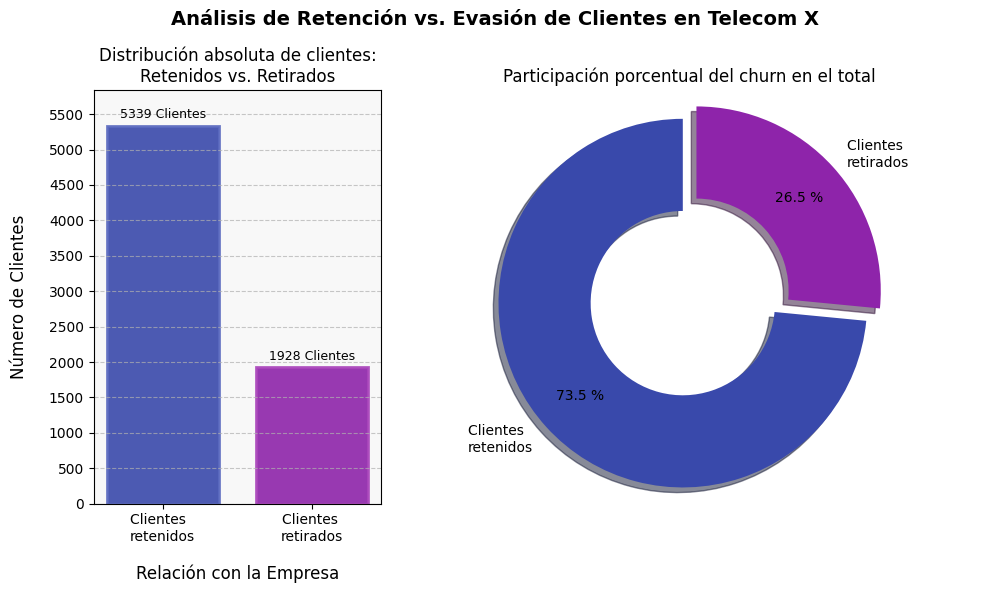

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Paleta en tonos azules y morados
colores = ['#3949AB', '#8E24AA']          # Azul y morado
bordes  = ['#5C6BC0', '#AB47BC']          # Bordes más claros

# Ejemplo de datos (ajusta con tus variables reales)
Clientes = [Adentro, Afuera]
eleccion = ['Clientes  \nretenidos', 'Clientes \nretirados']

# Gráfico de barras junto al gráfico de dona
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [0.5, 1]})
fig.suptitle('Análisis de Retención vs. Evasión de Clientes en Telecom X', fontsize=14, fontweight='bold')

# Gráfico de dona
porciones = ax1.pie(
       Clientes,
       labels=eleccion,
       autopct="%0.1f %%",
       labeldistance=1.1,
       pctdistance=0.75,
       colors=colores,
       wedgeprops=dict(width=0.5),
       shadow=True,
       startangle=90,
       explode=(0.1, 0)
)

ax1.set_title('Participación porcentual del churn en el total', fontsize=12)
ax1.axis("equal")

# Gráfico de barras
ax2.set_facecolor('#F8F8F8')

bars = ax2.bar(
    eleccion,
    Clientes,
    color=colores,
    edgecolor=bordes,
    width=0.75,
    align='center',
    alpha=0.9,
    linewidth=2
)

ax2.set_title('Distribución absoluta de clientes:\nRetenidos vs. Retirados', fontsize=12)
ax2.set_xlabel('Relación con la Empresa', fontsize=12, labelpad=15)
ax2.set_ylabel('Número de Clientes', fontsize=12, labelpad=15)
ax2.set_ylim(0, max(Clientes) + 500)
ax2.tick_params(axis='both', labelsize=10)

# Etiquetas en barras
Texto_barras = [f'{int(c)} Clientes' for c in Clientes]
ax2.bar_label(bars, labels=Texto_barras, padding=3, fontsize=9)

ax2.set_yticks(range(0, max(Clientes) + 500, 500))
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Variable categórica a analizar
categoria_genero = 'genero'

# Agrupar por categoría + abandono
resumen_genero_abandono = df_Datos_Traducidos.groupby([categoria_genero, 'abandono_cliente']).size().unstack()
valores_exteriores = resumen_genero_abandono.T.values.flatten().tolist()

Afuera = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'Si'].shape[0]
Adentro = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'No'].shape[0]
Clientes = [Adentro, Afuera]

etiquetas_totales_abandono = ['Retenidos','Evadidos']
etiquetas_genero_abandono = ['Retenidos - Femeninos','Retenidos - Masculinos','Evadidos - Femeninos','Evadidos - Masculinos']

colores_estado_abandono = ['#4CAF50', '#E53935']  # Retenidos / Evadidos
colores_genero_por_estado = ['#4CAF50', '#81C784', '#E53935', '#EF9A9A']
# Ret. Masc, Ret. Fem, Eva. Masc, Eva. Fem

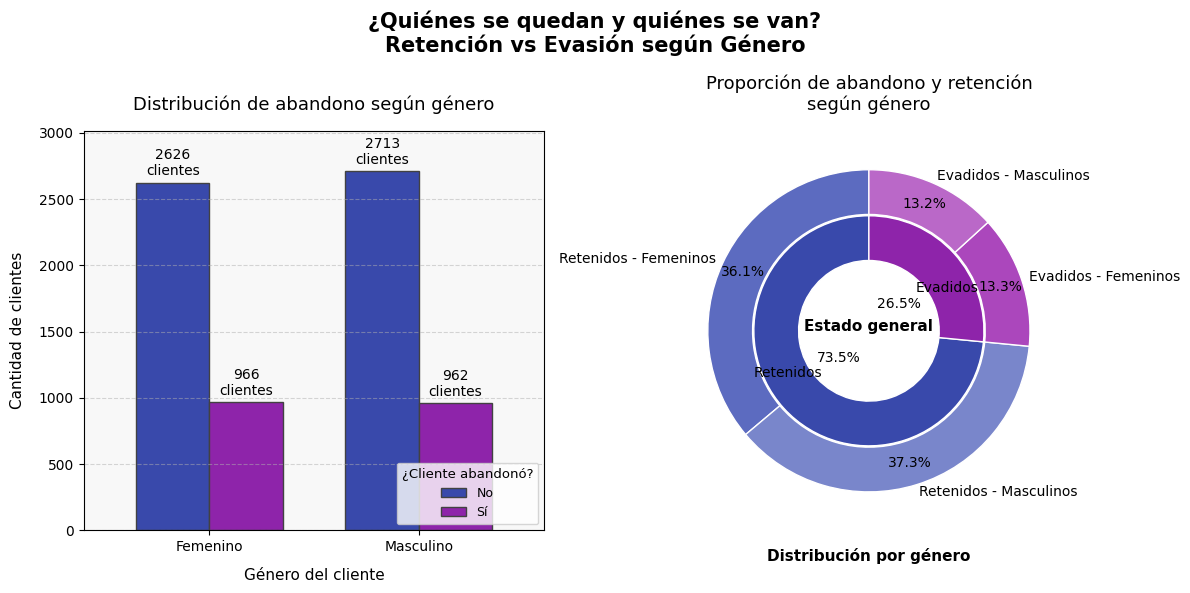

In [96]:
# Figura combinada
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1.3, 1]})
fig.suptitle('¿Quiénes se quedan y quiénes se van?\nRetención vs Evasión según Género', fontsize=15, fontweight='bold')

# Paletas de colores en azules y morados
colores_estado_abandono   = ["#3949AB", "#8E24AA"]   # Azul = Retenidos, Morado = Retirados
colores_genero_por_estado = ["#5C6BC0", "#7986CB", "#AB47BC", "#BA68C8"]  # Variantes para géneros

# Gráfico de Barras (izquierda)
resumen_genero_abandono.plot(
    kind='bar',
    stacked=False,
    color=colores_estado_abandono,
    ax=ax2,
    edgecolor=["#424242"],
    width=0.7
)

ax2.set_title('Distribución de abandono según género', fontsize=13, pad=15)
ax2.set_xlabel('Género del cliente', fontsize=11, labelpad=10)
ax2.set_ylabel('Cantidad de clientes', fontsize=11, labelpad=10)
ax2.set_ylim(0, max(valores_exteriores) + 300)
ax2.set_facecolor('#f8f8f8')
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.tick_params(axis='both', labelsize=10)
ax2.set_xticklabels(resumen_genero_abandono.index, rotation=0)

# Etiquetas sobre las barras
for nombre in ax2.containers:
    ax2.bar_label(nombre, fmt='%d\nclientes', label_type='edge', fontsize=10, padding=3)

ax2.legend(title='¿Cliente abandonó?', labels=['No', 'Sí'], fontsize=9, title_fontsize=9.5, loc='lower right')

# Gráfico de dona doble (derecha)
ax1.set_title('Proporción de abandono y retención\nsegún género', fontsize=13, pad=15)

ax1.text(0, 0, 'Estado general', ha='center', fontsize=11, fontweight='bold')
ax1.text(0, -1.8, 'Distribución por género', ha='center', fontsize=11, fontweight='bold')

# Círculo exterior (anillo por género)
ax1.pie(
    valores_exteriores,
    radius=1.26,
    labels=etiquetas_genero_abandono,
    colors=colores_genero_por_estado,
    labeldistance=1.05,
    wedgeprops=dict(width=0.35, edgecolor='white'),
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.86,
)

# Círculo interior (estado general)
ax1.pie(
    Clientes,
    radius=0.9,
    labels=etiquetas_totales_abandono,
    colors=colores_estado_abandono,
    labeldistance=0.55,
    wedgeprops=dict(width=0.35, edgecolor='white'),
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.35,
)

ax1.axis('equal')  # Mantener círculo perfecto

plt.tight_layout()
plt.show()


In [97]:
# Variable categórica a analizar
variable_2 = 'contrato'

# Agrupar por categoría + abandono
ab_cont = df_Datos_Traducidos.groupby([variable_2, 'abandono_cliente']).size().unstack().sort_values(by='Si', ascending=False)


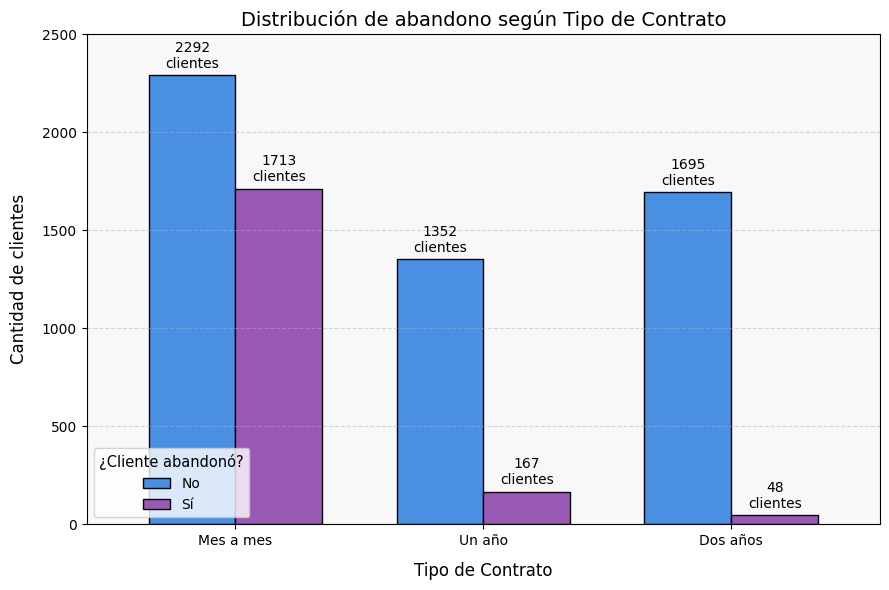

In [98]:
# Crear gráfico de barras lado a lado (no apilado) con colores azul y morado
ax3 = ab_cont.plot(
    kind='bar',
    stacked=False,
    color=['#4a90e2', '#9b59b6'],  # Azul y morado
    figsize=(9, 6),
    edgecolor='black',
    width=0.7
)

# Títulos descriptivos
plt.title('Distribución de abandono según Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato', fontsize=12, labelpad=10)
plt.ylabel('Cantidad de clientes', fontsize=12, labelpad=10)

# Mejorar ejes
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas con la cantidad exacta de clientes sobre cada barra
for nombre in ax3.containers:
    ax3.bar_label(nombre, fmt='%d\nclientes', label_type='edge', fontsize=10, padding=3)

# Leyenda clara
plt.legend(title='¿Cliente abandonó?', labels=['No', 'Sí'], fontsize=10, title_fontsize=10.5, loc='lower left')

plt.ylim(0, 2500)
ax3.set_facecolor('#f8f8f8')

# Margen automático
plt.tight_layout()
plt.show()


In [99]:
# Variable categórica a analizar
variable_3 = 'metodo_pago'

# Agrupar por categoría + abandono
ab_met_pag = df_Datos_Traducidos.groupby([variable_3, 'abandono_cliente']).size().unstack().sort_values(by='No', ascending=False)

maxlist = ab_met_pag.T.values.flatten().tolist()

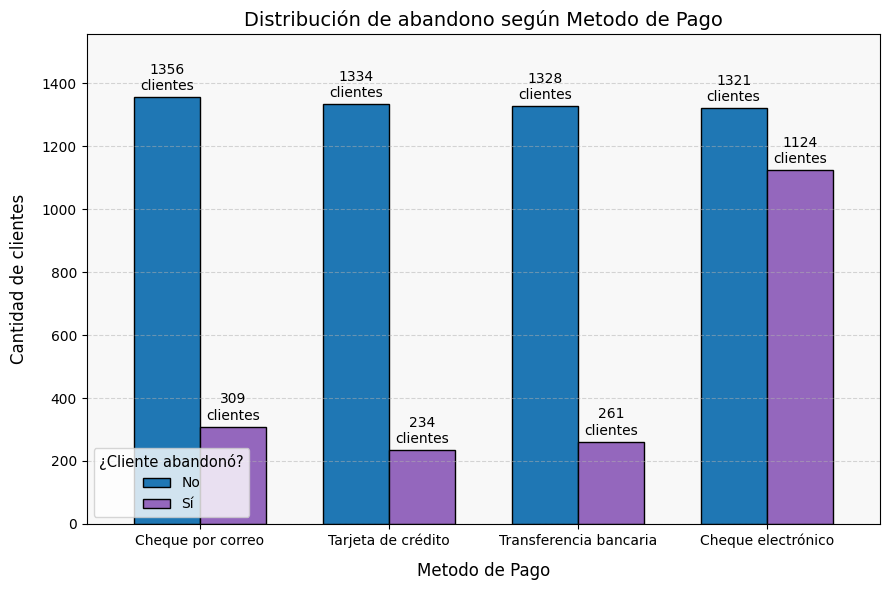

In [100]:
# Crear gráfico de barras lado a lado (no apilado)
ax3 = ab_met_pag.plot(
    kind='bar',
    stacked=False,
    color=['#1f77b4', '#9467bd'],  # Cambiado a azul y morado
    figsize=(9, 6),
    edgecolor='black',
    width=0.7
)

# Títulos descriptivos
plt.title('Distribución de abandono según Metodo de Pago', fontsize=14)
plt.xlabel('Metodo de Pago', fontsize=12, labelpad=10)
plt.ylabel('Cantidad de clientes', fontsize=12, labelpad=10)

# Mejorar ejes
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.ylim(0, max(maxlist) + 200)

# Etiquetas con la cantidad exacta de clientes sobre cada barra
for nombre in ax3.containers:
    ax3.bar_label(nombre, fmt='%d\nclientes', label_type='edge', fontsize=10, padding=3)

# Leyenda clara
plt.legend(title='¿Cliente abandonó?', labels=['No', 'Sí'], fontsize=10, title_fontsize=10.5, loc='lower left')

# Modificar los nombres de las ticks del eje x
ax3.set_xticklabels(['Cheque por correo', 'Tarjeta de crédito', 'Transferencia bancaria', 'Cheque electrónico'], fontsize=10)

# Fondo limpio
ax3.set_facecolor('#f8f8f8')

# Margen automático
plt.tight_layout()
plt.show()


In [101]:
def clasificar_combinacion_Servicios(fila):
    if fila['servicio_telefono'] == 'No' and fila['servicio_internet'] == 'No':
        return 'Sin servicios'
    elif fila['servicio_telefono'] == 'No' and fila['servicio_internet'] == 'Fibra óptica':
        return 'Solo\nInternet Fibra'
    elif fila['servicio_telefono'] == 'No' and fila['servicio_internet'] == 'DSL':
        return 'Solo\nInternet DSL'
    elif fila['servicio_telefono'] == 'Si' and fila['servicio_internet'] == 'No':
        return 'Solo\nTelefono'
    elif fila['servicio_telefono'] == 'Si' and fila['servicio_internet'] == 'DSL':
        return 'Paquete\nTel+DSL'
    elif fila['servicio_telefono'] == 'Si' and fila['servicio_internet'] == 'Fibra óptica':
        return 'Paquete\nTel+Fibra'
    else:
        return 'Otro caso no contemplado'  # Captura cualquier combinación inesperada

df_Datos_Traducidos['serv_basicos_selec'] = df_Datos_Traducidos.apply(clasificar_combinacion_Servicios, axis=1)

In [102]:
# Agrupación
df_servicios_basicos = df_Datos_Traducidos.groupby(['serv_basicos_selec', 'abandono_cliente']).size().unstack().fillna(0)

# Orden personalizado de las categorías
orden_2 = ['Solo\nTelefono','Solo\nInternet DSL','Solo\nInternet Fibra','Paquete\nTel+DSL','Paquete\nTel+Fibra']
df_servicios_basicos = df_servicios_basicos.reindex(orden_2)

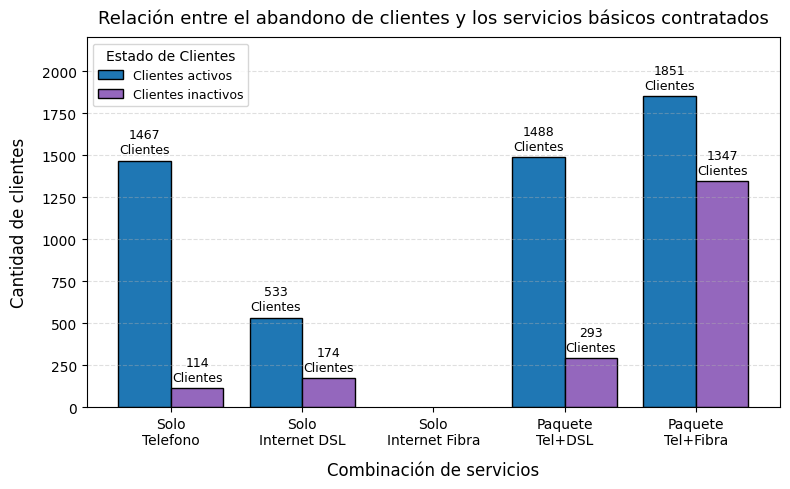

In [103]:
# Graficar barras agrupadas
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4
x = range(len(df_servicios_basicos))

ax.bar(
    [i - bar_width/2 for i in x],
    df_servicios_basicos['No'],
    width=bar_width,
    label='Clientes activos',
    color='#1f77b4',  # Cambiado a azul
    edgecolor='black'
)

ax.bar(
    [i + bar_width/2 for i in x],
    df_servicios_basicos['Si'],
    width=bar_width,
    label='Clientes inactivos',
    color='#9467bd',  # Cambiado a morado
    edgecolor='black'
)

# Etiquetas
ax.set_xticks(list(x))
ax.set_xticklabels(orden_2, rotation=0)
ax.set_ylabel('Cantidad de clientes', fontsize=12, labelpad=10)
ax.set_xlabel('Combinación de servicios', fontsize=12, labelpad=10)
ax.set_title('Relación entre el abandono de clientes y los servicios básicos contratados', fontsize=13, pad=10)
ax.legend(title='Estado de Clientes', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Etiquetas con la cantidad exacta de clientes sobre cada barra
for nombre in ax.containers:
    ax.bar_label(nombre, fmt='%d\nClientes', label_type='edge', fontsize=9, padding=3)

ax.set_ylim(0, 2200)

plt.tight_layout()
plt.show()


In [104]:
print(df_Datos_Traducidos[
    (df_Datos_Traducidos['servicio_internet'] == 'Fibra óptica') &
    (df_Datos_Traducidos['servicio_telefono'] == 'No')
].shape[0])  # Devuelve el número de filas que cumplen la condición

0


In [105]:
print(df_Datos_Traducidos['serv_basicos_selec'].value_counts())

serv_basicos_selec
Paquete\nTel+Fibra    3198
Paquete\nTel+DSL      1781
Solo\nTelefono        1581
Solo\nInternet DSL     707
Name: count, dtype: int64


In [106]:
print(df_Datos_Traducidos['servicio_internet'].value_counts())
print("-"*40)
print(df_Datos_Traducidos['servicio_telefono'].value_counts())

servicio_internet
Fibra óptica    3198
DSL             2488
No              1581
Name: count, dtype: int64
----------------------------------------
servicio_telefono
Si    6560
No     707
Name: count, dtype: int64


In [107]:
df_servicios_basicos.head()

abandono_cliente,No,Si
serv_basicos_selec,,
Solo\nTelefono,1467.0,114.0
Solo\nInternet DSL,533.0,174.0
Solo\nInternet Fibra,NaN,NaN
Paquete\nTel+DSL,1488.0,293.0
Paquete\nTel+Fibra,1851.0,1347.0


In [108]:
def clasificar_Ad_servicios(fila):
    cantidad_serv = 0

    # Servicios de teléfono
    if fila['servicio_telefono'] == 'Si':
        if fila.get('ad.multiples_lineas') == 'Si':  # Usamos .get() por si la columna no existe
            cantidad_serv += 1

    # Servicios de internet (solo si tiene internet)
    if fila['servicio_internet'] in ['DSL', 'Fibra óptica']:
        if fila.get('ad.seguridad_online') == 'Si':
            cantidad_serv += 1
        if fila.get('ad.respaldo_online') == 'Si':
            cantidad_serv += 1
        if fila.get('ad.proteccion_dispositivo') == 'Si':
            cantidad_serv += 1
        if fila.get('ad.soporte_tecnico') == 'Si':
            cantidad_serv += 1
        if fila.get('tv.streaming') == 'Si':
            cantidad_serv += 1
        if fila.get('peliculas.streaming') == 'Si':
            cantidad_serv += 1

    # Clasificación final
    if cantidad_serv == 0:
        return "Sin Extras"
    elif cantidad_serv == 1:
        return "Inicial (1)"
    elif cantidad_serv == 2:
        return "Intermedio (2)"
    elif cantidad_serv == 3:
        return "Estándar (3)"
    elif cantidad_serv == 4:
        return "Premium (4)"
    elif cantidad_serv == 5:
        return "Premium+ (5)"
    elif cantidad_serv == 6:
        return "Full (6)"
    elif cantidad_serv == 7:
        return "Full+ (7)"
    else:
        return f"Servicios ({cantidad_serv})"

# Aplicar la función
df_Datos_Traducidos['cant_serv_ad'] = df_Datos_Traducidos.apply(clasificar_Ad_servicios, axis=1)

In [109]:
# Agrupación
df_comb_ad = df_Datos_Traducidos.groupby(['cant_serv_ad', 'abandono_cliente']).size().unstack()

# Orden personalizado de las categorías
orden_3 = ['Full+ (7)', 'Full (6)','Premium+ (5)','Premium (4)','Estándar (3)','Intermedio (2)','Inicial (1)','Sin Extras']
df_comb_ad = df_comb_ad.reindex(orden_3)

In [110]:
colores_activos = ['#4a6ed1', '#5577d4', '#6080d7', '#6b89da', '#7692dd', '#819bdd', '#8ca4e4', '#97adeb']
colores_inactivos = ['#8e44ad', '#944fb8', '#9a5bc3', '#a267ce', '#a873d9', '#ad80e4', '#b38def', '#b999fa']


In [111]:
colores_activos_invertido = colores_activos[::-1]
colores_inactivos_invertido = colores_inactivos[::-1]

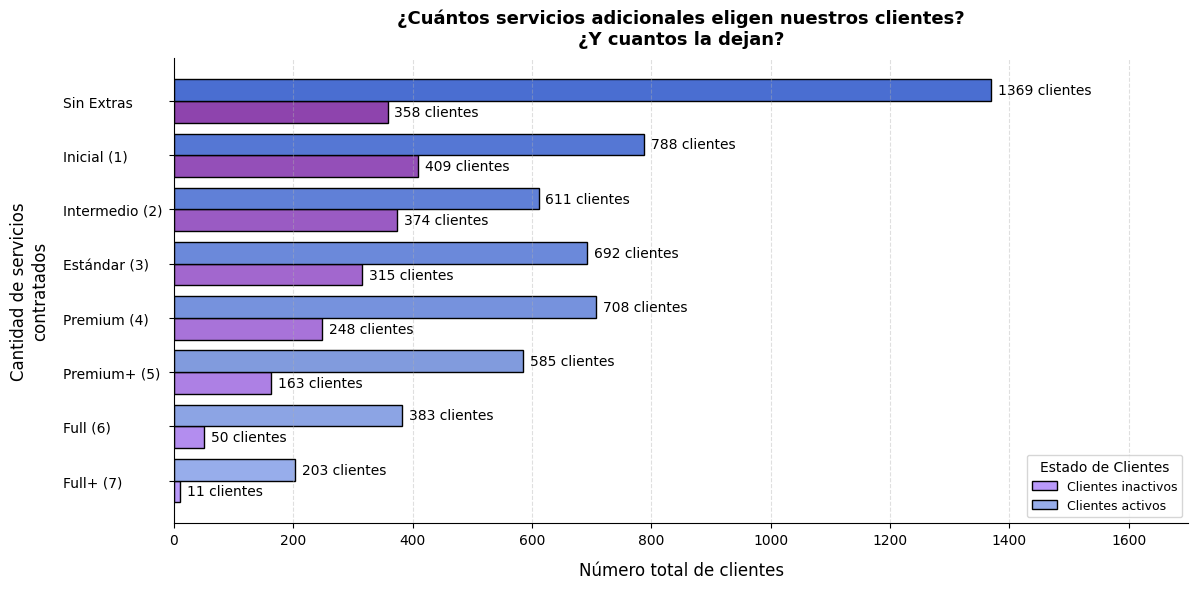

In [112]:
# Graficar barras horizontales agrupadas
fig, ax = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño para mejor legibilidad
bar_altura = 0.4  # Análogo a bar_altura pero para horizontal
y = range(len(df_comb_ad))


# Barras para clientes inactivos ('Si')
ax.barh(
    y=[i - bar_altura/2 for i in y],
    width=df_comb_ad['Si'],
    height=bar_altura,
    label='Clientes inactivos',
    color=colores_inactivos_invertido,
    edgecolor='black'
)

# Barras para clientes activos ('No')
ax.barh(
    y=[i + bar_altura/2 for i in y],  # Posición vertical
    width=df_comb_ad['No'],           # Longitud de la barra
    height=bar_altura,
    label='Clientes activos',
    color=colores_activos_invertido,
    edgecolor='black'
)

# Etiquetas
ax.set_yticks(y)
ax.set_yticklabels(orden_3, ha='left', x=-0.1)  # orden_3 define las categorías en el eje Y
ax.set_xlabel('Número total de clientes', fontsize=12, labelpad=10)
ax.set_ylabel('Cantidad de servicios\ncontratados', fontsize=12, labelpad=10)
ax.set_title('¿Cuántos servicios adicionales eligen nuestros clientes?\n¿Y cuantos la dejan?', ha= 'center',fontsize=13, fontweight='bold',pad=10)
ax.legend(title='Estado de Clientes', fontsize=9, loc='lower right')  # Mueve la leyenda si es necesario
ax.grid(axis='x', linestyle='--', alpha=0.4)  # Cambia a grid horizontal

ax.spines[['top','right']].set_visible(False)

# Etiquetas con la cantidad exacta de clientes
for titulos_bar in ax.containers:
    ax.bar_label(titulos_bar,
                fmt='%d clientes',
                label_type='edge',
                fontsize=10,
                padding=5)  # Ajusta el padding para horizontal

ax.set_xlim(0, 1700)  # Límite horizontal análogo a ylim

plt.tight_layout()
plt.show()

In [113]:
print(df_Datos_Traducidos['cant_serv_ad'].value_counts())

cant_serv_ad
Sin Extras        1727
Inicial (1)       1197
Estándar (3)      1007
Intermedio (2)     985
Premium (4)        956
Premium+ (5)       748
Full (6)           433
Full+ (7)          214
Name: count, dtype: int64


In [114]:
# Crear columna combinada
def clasificar_combinacion(fila):
    if fila['pareja'] == 'Si' and fila['dependientes'] == 'Si':
        return 'En pareja\ncon dependientes'
    elif fila['pareja'] == 'No' and fila['dependientes'] == 'No':
        return 'Individual\nsin dependientes'
    elif fila['pareja'] == 'Si' and fila['dependientes'] == 'No':
        return 'En pareja\nsin dependientes'
    elif fila['pareja'] == 'No' and fila['dependientes'] == 'Si':
        return 'Individual\ncon dependientes'

df_Datos_Traducidos['relacion_familiar'] = df_Datos_Traducidos.apply(clasificar_combinacion, axis=1)

In [115]:
# Agrupación
df_comb_abandono = df_Datos_Traducidos.groupby(['relacion_familiar', 'abandono_cliente']).size().unstack().fillna(0)

# Orden personalizado de las categorías
orden = ['En pareja\ncon dependientes', 'En pareja\nsin dependientes', 'Individual\ncon dependientes', 'Individual\nsin dependientes']
df_comb_abandono = df_comb_abandono.reindex(orden)

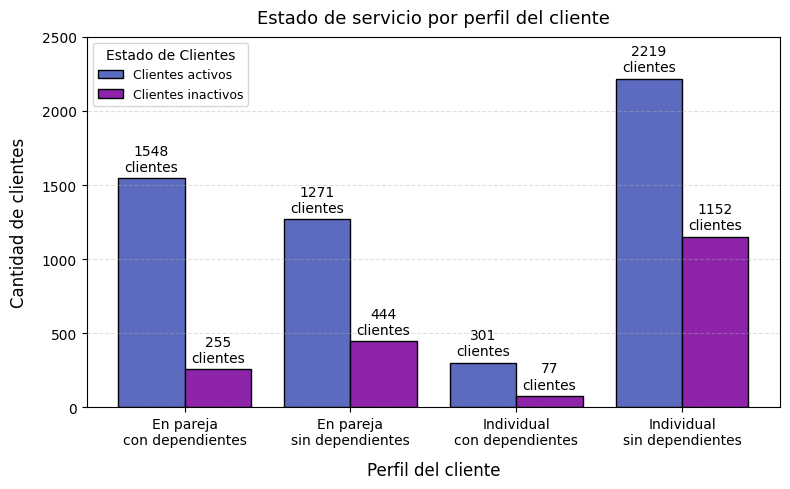

In [116]:
# Graficar barras agrupadas
fig, ax = plt.subplots(figsize=(8, 5))
bar_altura = 0.4
x = range(len(df_comb_abandono))

ax.bar(
    [i - bar_altura/2 for i in x],
    df_comb_abandono['No'],
    width=bar_altura,
    label='Clientes activos',
    color='#5c6bc0',  # azul
    edgecolor='black'
)

ax.bar(
    [i + bar_altura/2 for i in x],
    df_comb_abandono['Si'],
    width=bar_altura,
    label='Clientes inactivos',
    color='#8e24aa',  # morado
    edgecolor='black'
)

# Etiquetas
ax.set_xticks(list(x))
ax.set_xticklabels(orden, rotation=0)
ax.set_ylabel('Cantidad de clientes', fontsize=12, labelpad=10)
ax.set_xlabel('Perfil del cliente', fontsize=12, labelpad=10)
ax.set_title('Estado de servicio por perfil del cliente', fontsize=13, pad=10)
ax.legend(title='Estado de Clientes', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Etiquetas con la cantidad exacta de clientes sobre cada barra
for nombre in ax.containers:
    ax.bar_label(nombre, fmt='%d\nclientes', label_type='edge', fontsize=10, padding=3)

ax.set_ylim(0, 2500)

plt.tight_layout()
plt.show()


In [118]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def generar_degradado(color_hex, n_tonos=8):
    color_rgb = mcolors.hex2color(color_hex)
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom',
        [color_rgb, (1,1,1)],  # Desde el color hasta blanco
        N=n_tonos
    )
    return [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, n_tonos)]

# Degradado azul (#5C6BC0)
degradado_azul = generar_degradado('#5C6BC0')
print("Degradado azul =", degradado_azul)

# Degradado morado (#8E24AA)
degradado_morado = generar_degradado('#8E24AA')
print("Degradado morado =", degradado_morado)


Degradado azul = ['#5c6bc0', '#7380c9', '#8b95d2', '#a2aadb', '#b9c0e4', '#d0d5ed', '#e8eaf6', '#ffffff']
Degradado morado = ['#8e24aa', '#9e43b6', '#ae63c2', '#be82ce', '#cfa1db', '#dfc0e7', '#efe0f3', '#ffffff']


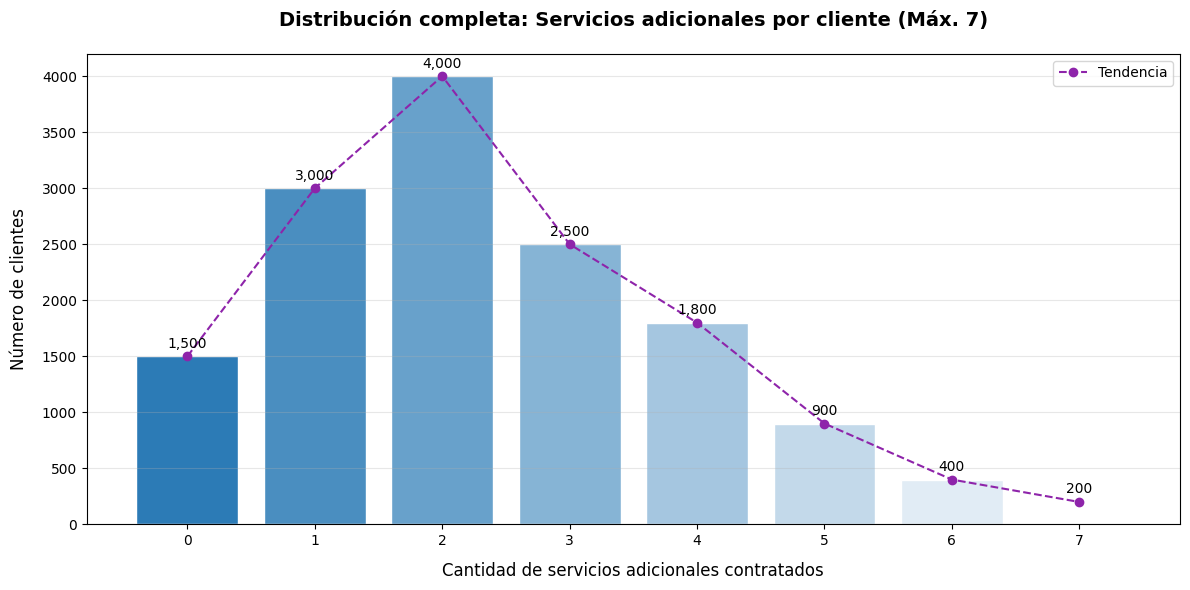

In [120]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Función para generar degradado
def generar_degradado(color_hex, n_tonos=8):
    color_rgb = mcolors.hex2color(color_hex)
    cmap = mcolors.LinearSegmentedColormap.from_list(
        'custom',
        [color_rgb, (1,1,1)],  # Desde el color hasta blanco
        N=n_tonos
    )
    return [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, n_tonos)]

# Degradados
degradado_azul = generar_degradado('#2c7bb6', 8)   # Azul
degradado_morado = generar_degradado('#8E24AA', 8)  # Morado

# Datos de ejemplo
categorias = ["0", "1", "2", "3", "4", "5", "6", "7"]
clientes = [1500, 3000, 4000, 2500, 1800, 900, 400, 200]

# Graficar barras con degradado azul
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(categorias, clientes, color=degradado_azul, edgecolor='white')

# Personalización
ax.set_xlabel("Cantidad de servicios adicionales contratados", fontsize=12, labelpad=10)
ax.set_ylabel("Número de clientes", fontsize=12, labelpad=10)
ax.set_title(
    "Distribución completa: Servicios adicionales por cliente (Máx. 7)",
    fontsize=14,
    pad=20,
    weight='bold'
)

# Etiquetas con valores
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 50,
            f"{height:,}",
            ha='center',
            va='bottom',
            fontsize=10)

# Línea de tendencia (opcional)
ax.plot(categorias, clientes, color='#8E24AA', linestyle='--', marker='o', label='Tendencia')
ax.legend()

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [121]:
df_Datos_Traducidos['meses_antiguedad'].describe()

,meses_antiguedad
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


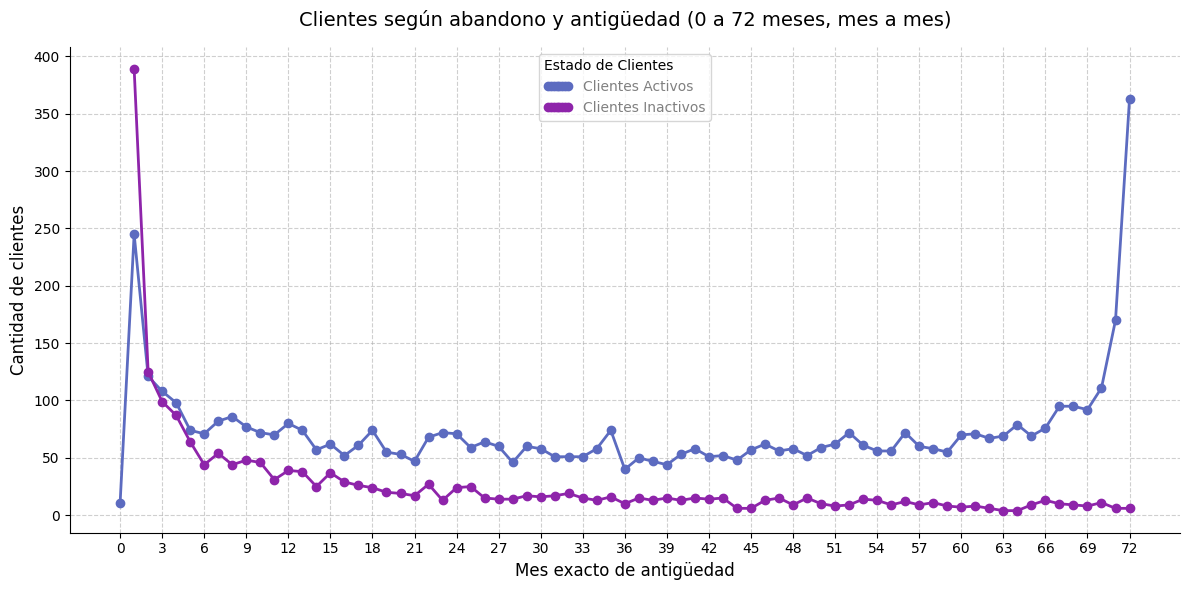

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtramos para mostrar de 0 a 72 meses
df_rango_completo = df_Datos_Traducidos[df_Datos_Traducidos['meses_antiguedad'] <= 72]

# Agrupamos por mes exacto y abandono
abandono_por_mes = df_rango_completo.groupby(['meses_antiguedad', 'abandono_cliente']).size().unstack()

# Graficamos
fig, ax = plt.subplots(figsize=(12, 6))
abandono_por_mes.plot(
    kind='line',
    marker='o',
    ax=ax,
    color=['#5C6BC0', '#8E24AA'],  # azul y morado
    linewidth=2
)

# Ajustes de estilo
ax.spines[['top','right']].set_visible(False)

plt.title('Clientes según abandono y antigüedad (0 a 72 meses, mes a mes)', fontsize=14, pad=15)
plt.xlabel('Mes exacto de antigüedad', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 73, 3))  # cada 3 meses para claridad
plt.legend(
    ['Clientes Activos', 'Clientes Inactivos'],
    title='Estado de Clientes',
    title_fontsize=10,
    loc='upper center',
    labelcolor='grey',
    numpoints=8,
    frameon=True,
    alignment='left'
)

plt.tight_layout()
plt.show()



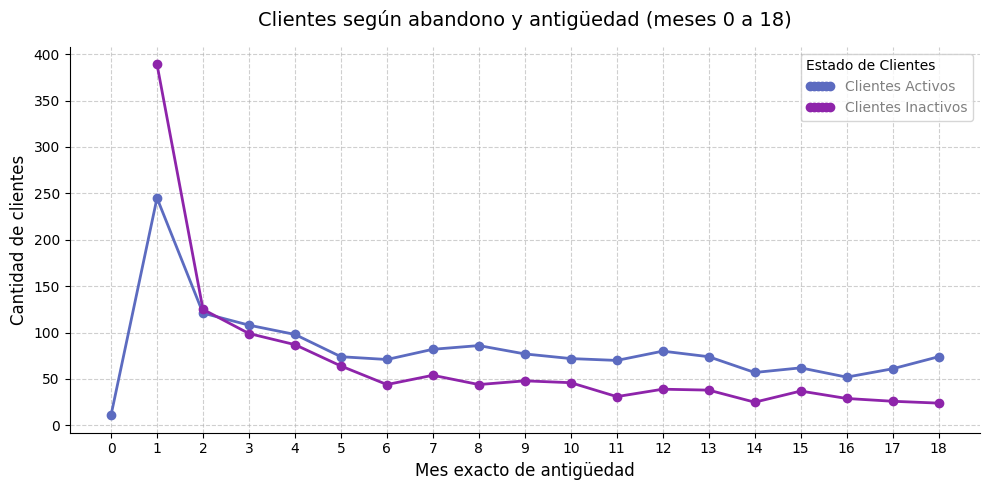

In [125]:
# Filtramos hasta el mes 18
df_zoom = df_Datos_Traducidos[df_Datos_Traducidos['meses_antiguedad'] <= 18]

# Agrupamos por mes puntual y abandono
abandono_por_mes = df_zoom.groupby(['meses_antiguedad', 'abandono_cliente']).size().unstack()

# Graficamos
fig, ax = plt.subplots(figsize=(10, 5))
abandono_por_mes.plot(
    kind='line',
    marker='o',
    ax=ax,
    color=['#5C6BC0', '#8E24AA'],  # Azul y morado
    linewidth=2
)

# Ajustes de estilo
ax.spines[['top','right']].set_visible(False)
plt.title('Clientes según abandono y antigüedad (meses 0 a 18)', fontsize=14, pad=15)
plt.xlabel('Mes exacto de antigüedad', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 19))  # ticks de 0 a 18
plt.legend(
    ['Clientes Activos', 'Clientes Inactivos'],
    title='Estado de Clientes',
    title_fontsize=10,
    loc='upper right',
    labelcolor='grey',
    numpoints=6,
    frameon=True,
    alignment='left'
)

plt.tight_layout()
plt.show()


/tmp/ipython-input-383394180.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_antiguedad = df_Datos_Traducidos.groupby(['segmento_antiguedad', 'abandono_cliente']).size().unstack()


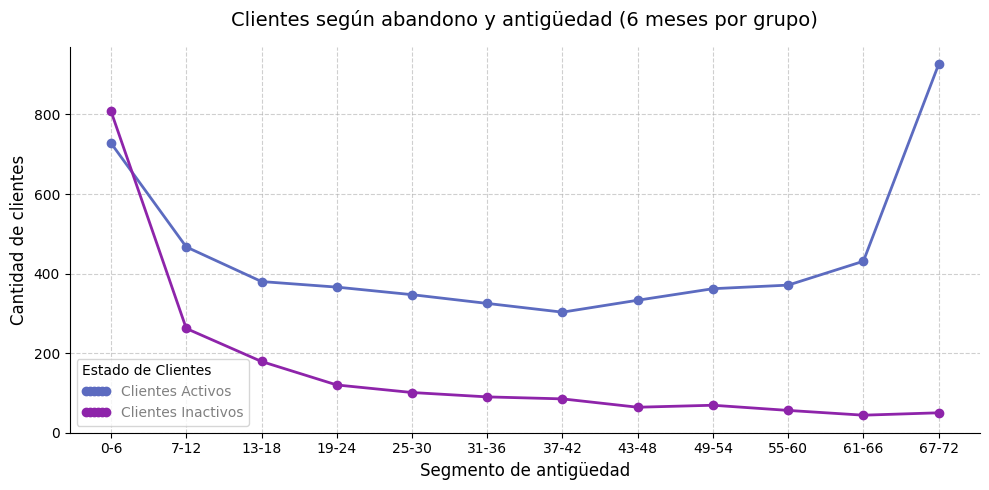

In [126]:
# Binning cada 6 meses
recorte = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72]
labels = ['0-6', '7-12', '13-18','19-24','25-30','31-36','37-42','43-48','49-54','55-60','61-66','67-72']
df_Datos_Traducidos['segmento_antiguedad'] = pd.cut(
    df_Datos_Traducidos['meses_antiguedad'],
    bins=recorte,
    labels=labels,
    include_lowest=True
)

# Agrupamos
abandono_por_antiguedad = df_Datos_Traducidos.groupby(['segmento_antiguedad', 'abandono_cliente']).size().unstack()

# Graficamos
fig, ax = plt.subplots(figsize=(10, 5))
abandono_por_antiguedad.plot(
    kind='line',
    marker='o',
    ax=ax,
    color=['#5C6BC0', '#8E24AA'],  # Azul y morado
    linewidth=2
)

# Etiquetas completas en eje X
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.spines[['top','right']].set_visible(False)

plt.title('Clientes según abandono y antigüedad (6 meses por grupo)', fontsize=14, pad=15)
plt.xlabel('Segmento de antigüedad', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(
    ['Clientes Activos', 'Clientes Inactivos'],
    title='Estado de Clientes',
    title_fontsize=10,
    loc='lower left',
    labelcolor='grey',
    numpoints=6,
    frameon=True,
    alignment='left'
)
plt.tight_layout()
plt.show()


In [127]:
# Agrupamos por abandono y extraemos estadísticas clave
agrupacion = df_Datos_Traducidos.groupby('abandono_cliente')['cargo.diario']
stad = agrupacion.agg([
    'count', 'mean', 'median', 'std', 'min', 'max',
    lambda x: x.quantile(0.25),  # Q1
    lambda x: x.quantile(0.75),  # Q3
    lambda x: (x < 1).mean() * 100
])
stad.columns = ['N', 'Media', 'Mediana', 'Desv.Std', 'Mínimo', 'Máximo', 'Q1', 'Q3', '% cargo < $1']
stad['IQR'] = stad['Q3'] - stad['Q1']

# Posiciones horizontales de los grupos
grupos = ['No', 'Si']
x_pos = [1, 2]

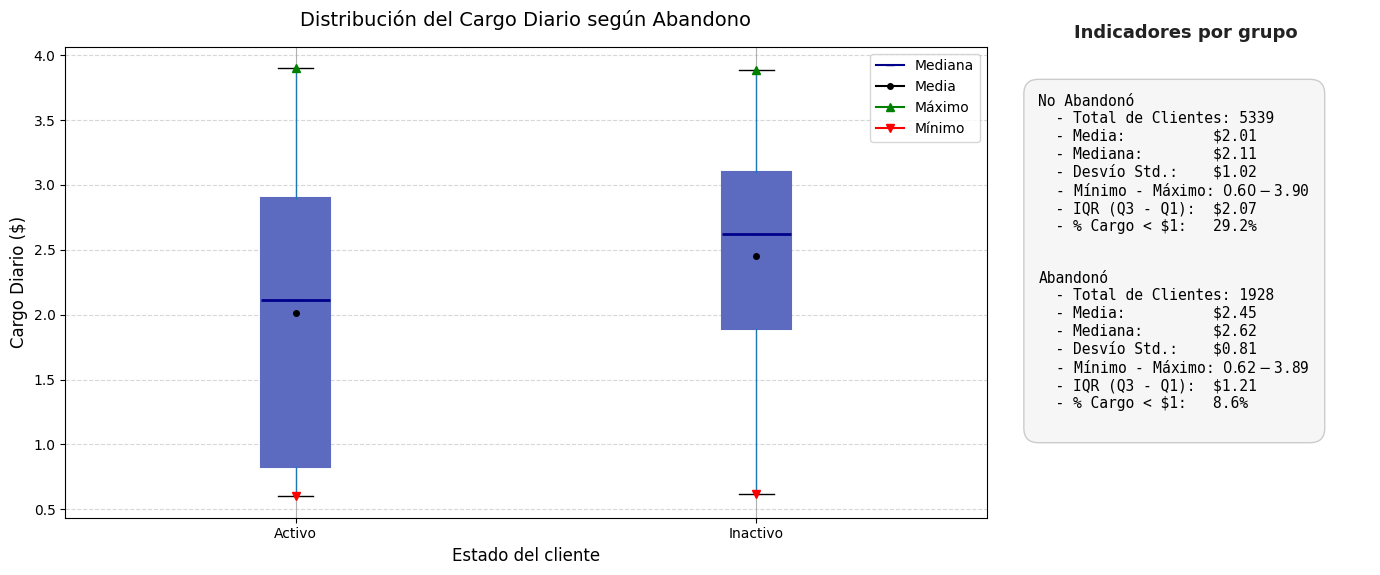

In [128]:
# Creamos figura
fig, (ax_plot, ax_texto) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2.5, 1]})

# Boxplot con colores azul y morado
boxprops = dict(facecolor='#5C6BC0', color='#5C6BC0', linewidth=1.5)
medianprops = dict(color='darkblue', linewidth=2)
df_Datos_Traducidos.boxplot(
    column='cargo.diario',
    by='abandono_cliente',
    ax=ax_plot,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops
)

ax_plot.set_title('Distribución del Cargo Diario según Abandono', fontsize=14, pad=15)
ax_plot.set_xlabel('Estado del cliente', fontsize=12)
ax_plot.set_ylabel('Cargo Diario ($)', fontsize=12)
ax_plot.grid(True, axis='y', linestyle='--', alpha=0.5)
ax_plot.set_xticklabels(labels=['Activo','Inactivo'], fontsize=10)

# Añadimos puntos de estadísticas al gráfico
colores = {'Mediana':'darkblue', 'Media':'black', 'Máximo':'green', 'Mínimo':'red'}
marcadores = {'Mediana':'_', 'Media':'o', 'Máximo':'^', 'Mínimo':'v'}
tamanos = {'Mediana':6, 'Media':4, 'Máximo':6, 'Mínimo':6}

for i, grupo in enumerate(grupos):
    fila = stad.loc[grupo]
    xpos = x_pos[i]
    for estad, color in colores.items():
        ax_plot.plot(
            xpos,
            fila[estad],
            marker=marcadores[estad],
            color=color,
            label=estad if i==0 else "",
            markersize=tamanos[estad]
        )

# Leyenda solo una vez
ax_plot.legend(loc='upper right')

# Zona de texto
ax_texto.axis('off')
ax_texto.set_title('Indicadores por grupo', fontsize=13, loc='center', fontweight='bold', color='#222')

# Texto formateado
text_lines = []
for grupo, fila in stad.iterrows():
    estado = 'Abandonó\n' if grupo == 'Si' else 'No Abandonó\n'
    texto = (
        f"{estado}"
        f"  - Total de Clientes: {int(fila['N'])}\n"
        f"  - Media:          ${fila['Media']:.2f}\n"
        f"  - Mediana:        ${fila['Mediana']:.2f}\n"
        f"  - Desvío Std.:    ${fila['Desv.Std']:.2f}\n"
        f"  - Mínimo - Máximo: ${fila['Mínimo']:.2f} - ${fila['Máximo']:.2f}\n"
        f"  - IQR (Q3 - Q1):  ${fila['IQR']:.2f}\n"
        f"  - % Cargo < $1:   {fila['% cargo < $1']:.1f}%\n"
    )
    text_lines.append(texto)

ax_texto.text(
    0.1, 0.9, '\n\n'.join(text_lines),
    fontsize=10.5,
    verticalalignment='top',
    family='monospace',
    bbox=dict(boxstyle='round,pad=1', facecolor='#f6f6f6', edgecolor='#cccccc')
)

plt.suptitle('')
plt.tight_layout()
plt.show()


In [129]:
# Agrupamos por abandono y extraemos estadísticas clave
agrupacion = df_Datos_Traducidos.groupby('abandono_cliente')['cargo.mensual']
stad = agrupacion.agg([
    'count', 'mean', 'median', 'std', 'min', 'max',
    lambda x: x.quantile(0.25),  # Q1
    lambda x: x.quantile(0.75),  # Q3
    lambda x: (x < 20).mean() * 100  # % con cargo mensual < $20
])
stad.columns = ['N', 'Media', 'Mediana', 'Desv.Std', 'Mínimo', 'Máximo', 'Q1', 'Q3', '% cargo < $20']
stad['IQR'] = stad['Q3'] - stad['Q1']

# Posiciones horizontales de los grupos (orden del boxplot)
grupos = ['No', 'Si']
x_pos = [1, 2]

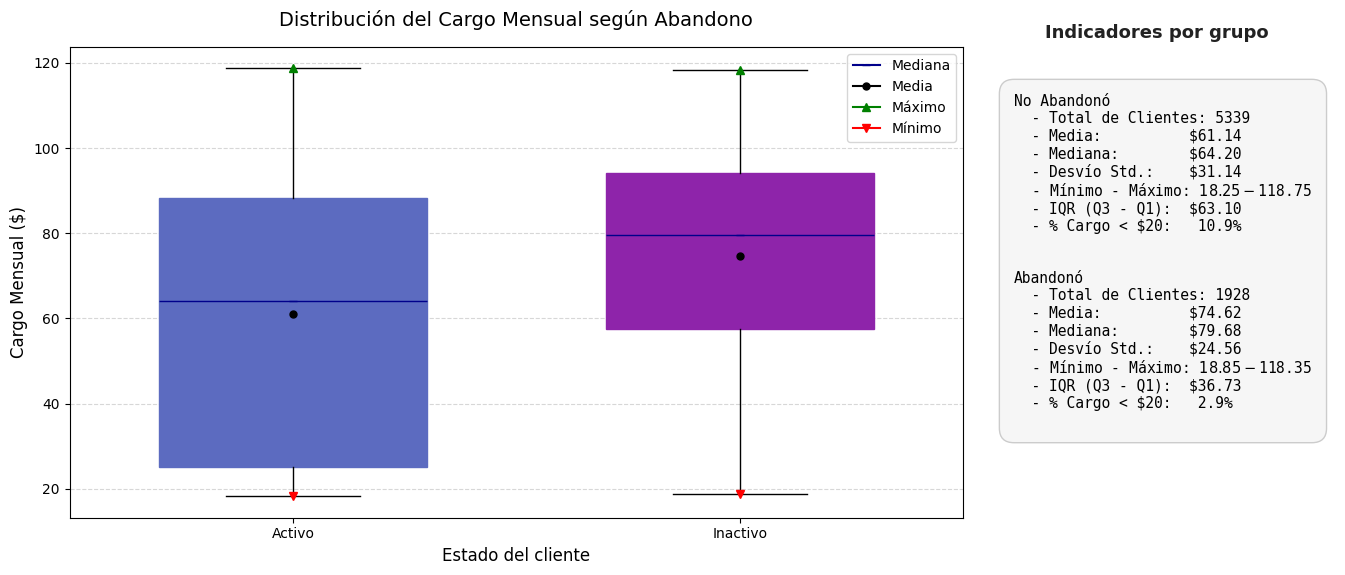

In [130]:
# Crear figura con espacio para texto
fig, (ax_plot, ax_texto) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2.5, 1]})

# Boxplot con colores azul y morado
colores_box = ['#5C6BC0', '#8E24AA']  # Azul para activo, morado para inactivo
for i, grupo in enumerate(['No', 'Si']):
    subset = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == grupo]['cargo.mensual']
    ax_plot.boxplot(
        subset,
        positions=[i+1],
        widths=0.6,
        patch_artist=True,
        medianprops=dict(color='darkblue'),
        boxprops=dict(facecolor=colores_box[i], color=colores_box[i])
    )

ax_plot.set_title('Distribución del Cargo Mensual según Abandono', fontsize=14, pad=15)
ax_plot.set_xlabel('Estado del cliente', fontsize=12)
ax_plot.set_ylabel('Cargo Mensual ($)', fontsize=12)
ax_plot.grid(True, axis='y', linestyle='--', alpha=0.5)
ax_plot.set_xticks([1, 2])
ax_plot.set_xticklabels(['Activo','Inactivo'], fontsize=10)

# Añadimos marcadores de estadísticas
colores = {'Mediana':'darkblue', 'Media':'black', 'Máximo':'green', 'Mínimo':'red'}
marcadores = {'Mediana':'_', 'Media':'o', 'Máximo':'^', 'Mínimo':'v'}
tamanos = {'Mediana':6, 'Media':5, 'Máximo':6, 'Mínimo':6}

for i, grupo in enumerate(grupos):
    fila = stad.loc[grupo]
    xpos = x_pos[i]
    for estad, color in colores.items():
        ax_plot.plot(
            xpos,
            fila[estad],
            marker=marcadores[estad],
            color=color,
            label=estad if i==0 else "",
            markersize=tamanos[estad]
        )

ax_plot.legend(loc='upper right')

# Área de texto
ax_texto.axis('off')
ax_texto.set_title('Indicadores por grupo', fontsize=13, loc='center', fontweight='bold', color='#222')

# Texto formateado
text_lines = []
for grupo, fila in stad.iterrows():
    estado = 'Abandonó\n' if grupo == 'Si' else 'No Abandonó\n'
    texto = (
        f"{estado}"
        f"  - Total de Clientes: {int(fila['N'])}\n"
        f"  - Media:          ${fila['Media']:.2f}\n"
        f"  - Mediana:        ${fila['Mediana']:.2f}\n"
        f"  - Desvío Std.:    ${fila['Desv.Std']:.2f}\n"
        f"  - Mínimo - Máximo: ${fila['Mínimo']:.2f} - ${fila['Máximo']:.2f}\n"
        f"  - IQR (Q3 - Q1):  ${fila['IQR']:.2f}\n"
        f"  - % Cargo < $20:   {fila['% cargo < $20']:.1f}%\n"
    )
    text_lines.append(texto)

ax_texto.text(
    0.1, 0.9, '\n\n'.join(text_lines),
    fontsize=10.5,
    verticalalignment='top',
    family='monospace',
    bbox=dict(boxstyle='round,pad=1', facecolor='#f6f6f6', edgecolor='#cccccc')
)

plt.suptitle('')
plt.tight_layout()
plt.show()


In [131]:
# Agrupamos por abandono y extraemos estadísticas clave
agrupacion = df_Datos_Traducidos.groupby('abandono_cliente')['cargo.total']
stad = agrupacion.agg([
    'count', 'mean', 'median', 'std', 'min', 'max',
    lambda x: x.quantile(0.25),  # Q1
    lambda x: x.quantile(0.5),  # Q2
    lambda x: x.quantile(0.75),  # Q3
    lambda x: (x < 30).mean() * 100  # % con cargo total < $30
])
stad.columns = ['N', 'Media', 'Mediana', 'Desv.Std', 'Mínimo', 'Máximo', 'Q1', 'Q2','Q3', '% cargo < $30']
stad['IQR'] = stad['Q3'] - stad['Q1']

# Orden de los grupos
grupos = ['No', 'Si']
x_pos = [1, 2]

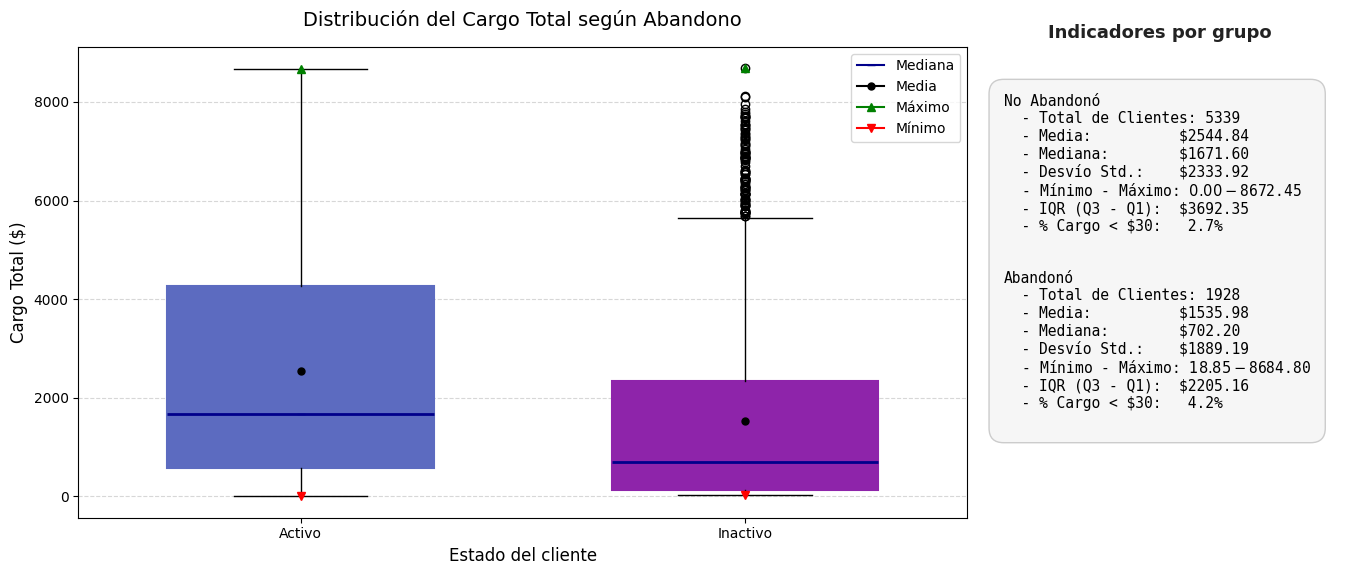

In [132]:
# Crear figura con espacio para texto
fig, (ax_plot, ax_texto) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2.5, 1]})

# Boxplot con colores azul y morado
colores_box = ['#5C6BC0', '#8E24AA']  # Azul para activo, morado para inactivo
for i, grupo in enumerate(['No', 'Si']):
    subset = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == grupo]['cargo.total']
    ax_plot.boxplot(
        subset,
        positions=[i+1],
        widths=0.6,
        patch_artist=True,
        medianprops=dict(color='darkblue', linewidth=2),
        boxprops=dict(facecolor=colores_box[i], color=colores_box[i], linewidth=1.5)
    )

ax_plot.set_title('Distribución del Cargo Total según Abandono', fontsize=14, pad=15)
ax_plot.set_xlabel('Estado del cliente', fontsize=12)
ax_plot.set_ylabel('Cargo Total ($)', fontsize=12)
ax_plot.grid(True, axis='y', linestyle='--', alpha=0.5)
ax_plot.set_xticks([1, 2])
ax_plot.set_xticklabels(['Activo','Inactivo'], fontsize=10)

# Añadimos marcadores de estadísticas
colores = {'Mediana':'darkblue', 'Media':'black', 'Máximo':'green', 'Mínimo':'red'}
marcadores = {'Mediana':'_', 'Media':'o', 'Máximo':'^', 'Mínimo':'v'}
tamanos = {'Mediana':6, 'Media':5, 'Máximo':6, 'Mínimo':6}

for i, grupo in enumerate(grupos):
    fila = stad.loc[grupo]
    xpos = x_pos[i]
    for estad, color in colores.items():
        ax_plot.plot(
            xpos,
            fila[estad],
            marker=marcadores[estad],
            color=color,
            label=estad if i==0 else "",
            markersize=tamanos[estad]
        )

ax_plot.legend(loc='upper right')

# Área de texto
ax_texto.axis('off')
ax_texto.set_title('Indicadores por grupo', fontsize=13, loc='center', fontweight='bold', color='#222')

text_lines = []
for grupo, fila in stad.iterrows():
    estado = 'Abandonó\n' if grupo == 'Si' else 'No Abandonó\n'
    texto = (
        f"{estado}"
        f"  - Total de Clientes: {int(fila['N'])}\n"
        f"  - Media:          ${fila['Media']:.2f}\n"
        f"  - Mediana:        ${fila['Mediana']:.2f}\n"
        f"  - Desvío Std.:    ${fila['Desv.Std']:.2f}\n"
        f"  - Mínimo - Máximo: ${fila['Mínimo']:.2f} - ${fila['Máximo']:.2f}\n"
        f"  - IQR (Q3 - Q1):  ${fila['IQR']:.2f}\n"
        f"  - % Cargo < $30:   {fila['% cargo < $30']:.1f}%\n"
    )
    text_lines.append(texto)

ax_texto.text(
    0.06, 0.9, '\n\n'.join(text_lines),
    fontsize=10.5,
    verticalalignment='top',
    family='monospace',
    bbox=dict(boxstyle='round,pad=1', facecolor='#f6f6f6', edgecolor='#cccccc')
)

plt.suptitle('')
plt.tight_layout()
plt.show()


In [133]:
df_Datos_Traducidos.describe()

,meses_antiguedad,cargo.diario,cargo.mensual,cargo.total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.127771,64.720098,2277.182035
std,24.571773,0.990534,30.129572,2268.648587
min,0.000000,0.600000,18.250000,0.000000
25%,9.000000,1.165000,35.425000,396.200000
50%,29.000000,2.310000,70.300000,1389.200000
75%,55.000000,2.955000,89.875000,3778.525000
max,72.000000,3.900000,118.750000,8684.800000


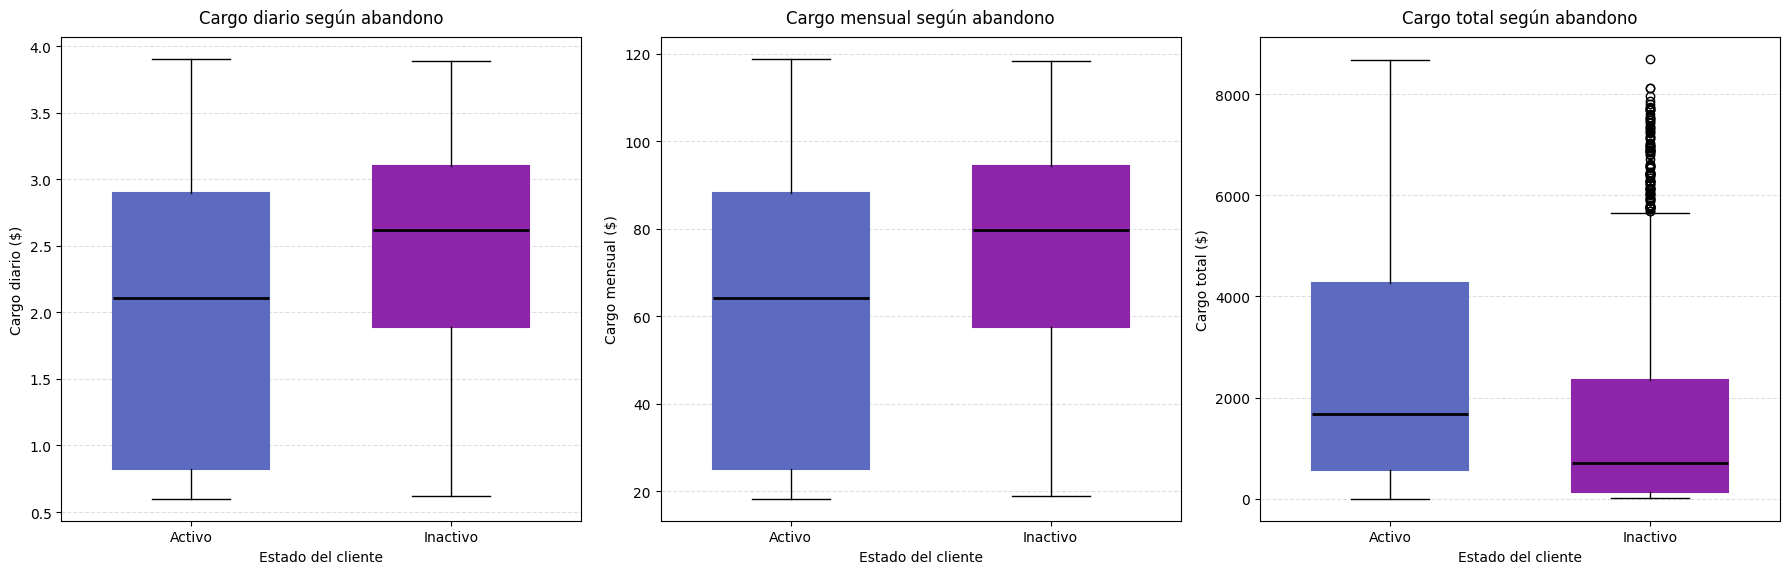

In [139]:
# Definir las variables y sus títulos
variables = [
    ('cargo.diario', 'Cargo diario'),
    ('cargo.mensual', 'Cargo mensual'),
    ('cargo.total', 'Cargo total')
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

colores_box = ['#5C6BC0', '#8E24AA']  # Azul para activo, morado para inactivo

for ax, (col, titulo) in zip(axes, variables):
    for i, grupo in enumerate(['No', 'Si']):
        subset = df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == grupo][col]
        ax.boxplot(
            subset,
            positions=[i+1],
            widths=0.6,
            patch_artist=True,
            medianprops=dict(color='black', linewidth=2),
            boxprops=dict(facecolor=colores_box[i], color=colores_box[i], linewidth=1.5)
        )
    ax.set_title(titulo + ' según abandono', fontsize=12, pad=10)
    ax.set_xlabel('Estado del cliente', fontsize=10)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Activo','Inactivo'], fontsize=10)
    ax.set_ylabel(titulo + ' ($)', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle('')  # Elimina título automático
plt.tight_layout()
plt.show()



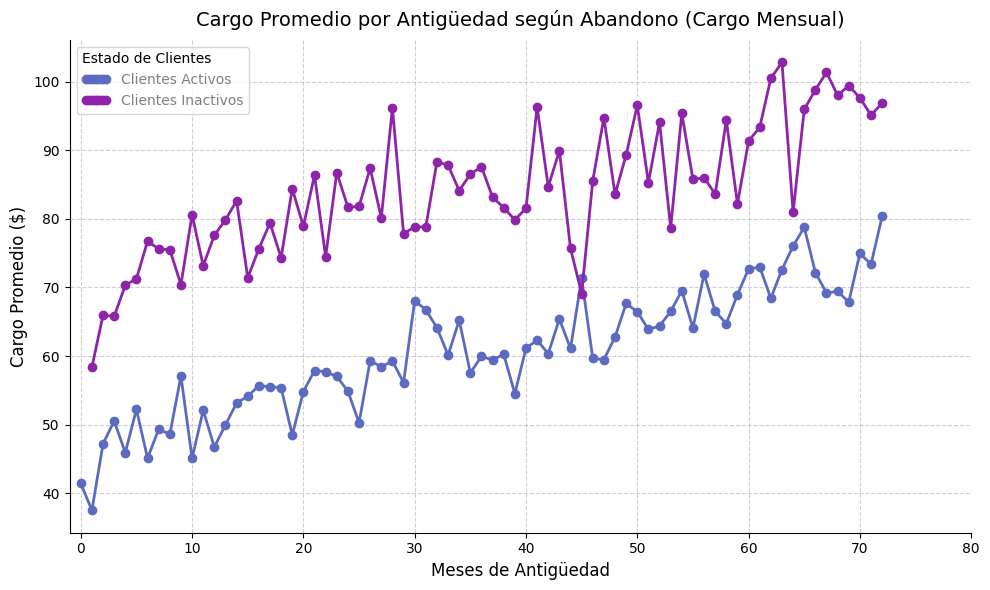

In [140]:
# Agrupamos promedio mensual
df_linea = df_Datos_Traducidos.groupby(
    ['meses_antiguedad', 'abandono_cliente']
)['cargo.mensual'].mean().unstack()

# Graficamos
ax = df_linea.plot(
    kind='line',
    figsize=(10,6),
    marker='o',
    color=['#5C6BC0', '#8E24AA'],  # Azul para activo, morado para inactivo
    linewidth=2
)

# Ajustes de estilo
ax.spines[['top','right']].set_visible(False)
plt.xlim(-1,80)
plt.title('Cargo Promedio por Antigüedad según Abandono (Cargo Mensual)', pad=10, fontsize=14)
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Cargo Promedio ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(
    ['Clientes Activos', 'Clientes Inactivos'],
    title='Estado de Clientes',
    title_fontsize=10,
    loc='upper left',
    labelcolor='grey',
    numpoints=8,
    frameon=True,
    alignment='left'
)
plt.tight_layout()
plt.show()


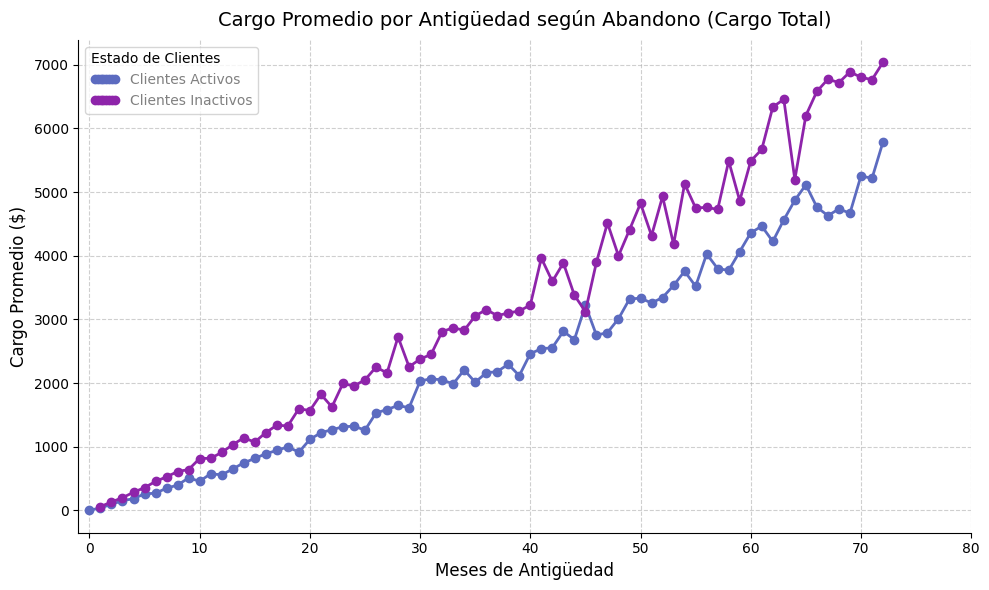

In [141]:
# Agrupamos promedio total
df_linea = df_Datos_Traducidos.groupby(
    ['meses_antiguedad', 'abandono_cliente']
)['cargo.total'].mean().unstack()

# Graficamos
ax = df_linea.plot(
    kind='line',
    figsize=(10,6),
    marker='o',
    color=['#5C6BC0', '#8E24AA'],  # Azul para activos, morado para inactivos
    linewidth=2
)

# Ajustes de estilo
ax.spines[['top','right']].set_visible(False)
plt.xlim(-1,80)
plt.title('Cargo Promedio por Antigüedad según Abandono (Cargo Total)', pad=10, fontsize=14)
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Cargo Promedio ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(
    ['Clientes Activos', 'Clientes Inactivos'],
    title='Estado de Clientes',
    title_fontsize=10,
    loc='upper left',
    labelcolor='grey',
    numpoints=8,
    frameon=True,
    alignment='left'
)
plt.tight_layout()
plt.show()


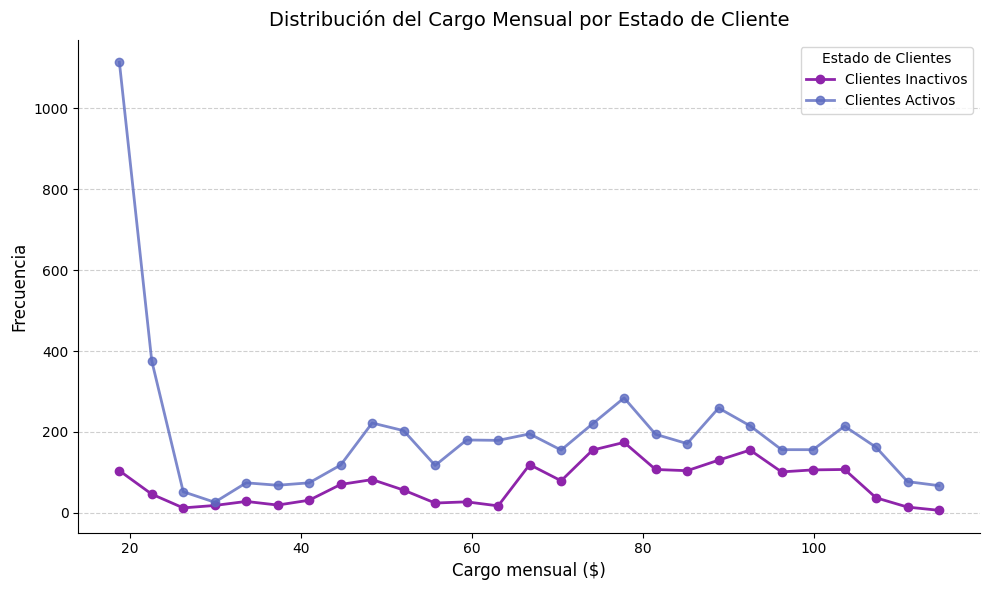

In [142]:
fig, ax = plt.subplots(figsize=(10, 6))

recortes = 27
rango = (df_Datos_Traducidos['cargo.mensual'].min(), df_Datos_Traducidos['cargo.mensual'].max())

# Abandonaron (Inactivos)
si_val, si_conj = pd.cut(
    df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'Si']['cargo.mensual'],
    bins=recortes, retbins=True
)
si_freq = si_val.value_counts(sort=False)
ax.plot(si_conj[:-1], si_freq.values, label='Clientes Inactivos', color='#8E24AA', linewidth=2, marker='o')

# No abandonaron (Activos)
no_val = pd.cut(
    df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'No']['cargo.mensual'],
    bins=si_conj
)
no_freq = no_val.value_counts(sort=False)
ax.plot(si_conj[:-1], no_freq.values, label='Clientes Activos', color='#5C6BC0', linewidth=2, marker='o', alpha=0.8)

# Ajustes de estilo
ax.spines[['top','right']].set_visible(False)
plt.title('Distribución del Cargo Mensual por Estado de Cliente', fontsize=14, pad=10)
plt.xlabel('Cargo mensual ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Estado de Clientes', fontsize=10, title_fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


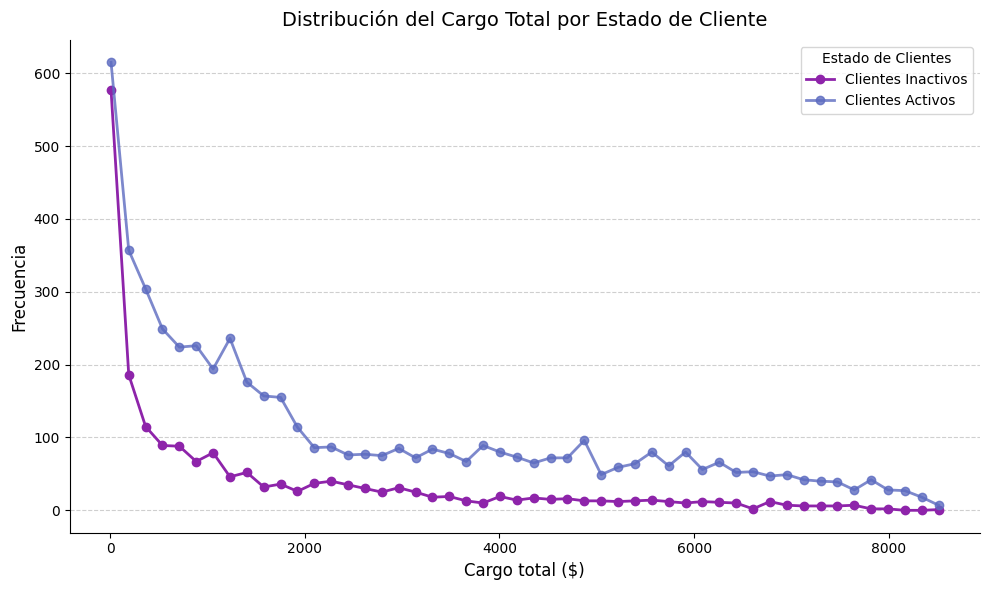

In [143]:
fig, ax = plt.subplots(figsize=(10, 6))

recorte = 50
rango = (df_Datos_Traducidos['cargo.total'].min(), df_Datos_Traducidos['cargo.total'].max())

# Clientes Inactivos (Abandonaron)
si_val, si_conj = pd.cut(
    df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'Si']['cargo.total'],
    bins=recorte, retbins=True
)
si_freq = si_val.value_counts(sort=False)
ax.plot(si_conj[:-1], si_freq.values, label='Clientes Inactivos', color='#8E24AA', linewidth=2, marker='o')

# Clientes Activos (No Abandonaron)
no_val = pd.cut(
    df_Datos_Traducidos[df_Datos_Traducidos['abandono_cliente'] == 'No']['cargo.total'],
    bins=si_conj
)
no_freq = no_val.value_counts(sort=False)
ax.plot(si_conj[:-1], no_freq.values, label='Clientes Activos', color='#5C6BC0', linewidth=2, marker='o', alpha=0.8)

# Ajustes de estilo
ax.spines[['top','right']].set_visible(False)
plt.title('Distribución del Cargo Total por Estado de Cliente', fontsize=14, pad=10)
plt.xlabel('Cargo total ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Estado de Clientes', fontsize=10, title_fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#📄Informe final

# Informe Final de Resultados – Comportamiento de Abandono de Clientes en TelecomX**

## Introducción

El objetivo de este informe es analizar el comportamiento de abandono de clientes (churn) en TelecomX, una compañía de telecomunicaciones con operaciones en LATAM. El churn representa un indicador crítico para cualquier empresa de servicios, ya que implica la pérdida de clientes y una disminución directa en ingresos y participación de mercado.

Comprender los motivos detrás de la salida de un cliente permite anticipar patrones de comportamiento, diseñar estrategias de retención efectivas y mejorar la experiencia general del usuario.

Este análisis busca responder preguntas clave:

- ¿Qué factores están más relacionados con el abandono?

- ¿Existen segmentos de clientes más propensos a darse de baja?

- ¿Cuándo y por qué abandonan los clientes?

## Limpieza y Preparación de Dato

Los datos se obtuvieron de una fuente remota en formato JSON, con información de más de 7,000 clientes. Se realizaron los siguientes pasos para asegurar la calidad del dataset:
### Importación y Transformación

- Conversión de columnas a tipos adecuados: float, bool, int, category.

- Traducción de variables categóricas para mejorar su interpretación en gráficos.

- Identificación y eliminación de columnas redundantes o irrelevantes.

### Limpieza de Datos

- Eliminación de valores faltantes y registros incompletos.

- Normalización de variables como cargo.total, cargo.mensual y meses_antiguedad.

- Creación de variables derivadas:

 - cargo.diario = cargo.mensual / 30

 - cant_serv_ad: cantidad de servicios adicionales contratados

**Nota**: Los datos se dividieron entre clientes que abandonaron (abandono_cliente = 'Si') y los que no ('No') para facilitar comparaciones.

## Análisis Exploratorio de Datos (EDA)

Se realizó un análisis detallado de las variables que más influyen en la retención y abandono. Se priorizó la claridad, la interpretación y el valor estratégico de los patrones identificados, seleccionando los gráficos que facilitan la toma de decisiones.

## Conclusiones e Insights
**1. Relación entre tarifa y churn**

Los clientes que abandonan presentan cargos diarios y mensuales más elevados, pero suelen irse antes de alcanzar un cargo total que justifique esos ingresos. Esto indica que un precio alto no garantiza satisfacción, y sin un valor percibido claro, aumenta la probabilidad de abandono.

**Insight clave**: Existe un umbral de tolerancia al precio que, si se supera sin beneficios tangibles, dispara la evasión.

___

**2. Segmentos de bajo ticket: vulnerabilidad y oportunidad**

Gran parte de los abandonos proviene de clientes con gasto acumulado bajo. Sin embargo, dentro de ese mismo rango, también existen clientes fieles. Esto demuestra que el valor económico actual no define por sí solo la permanencia, sino la percepción de beneficio relativo frente al costo.

**Insight clave**: Los clientes de bajo ticket tienen potencial de aumentar su gasto mediante cross-selling, upgrades o paquetes personalizados. Incentivos puntuales y propuestas de valor extendidas son especialmente efectivos.

___

**3. Tiempo como multiplicador de ingresos**

Se observa una relación casi lineal entre antigüedad y cargo total: más tiempo de permanencia genera mayor facturación. El churn temprano interrumpe esta curva, afectando la recuperación de costos de adquisición.

**Insight clave**: Garantizar la permanencia aumenta el lifetime value, reforzando la inversión en marketing, soporte y programas de fidelización.

___

**4. Zonas de riesgo tarifario**

Los clientes con tarifas medias-altas presentan mayor tendencia a desconectarse, generalmente por percepción de sobreprecio, problemas de facturación o falta de claridad sobre el valor recibido.

**Insight clave:** La percepción de desequilibrio entre precio y valor es un disparador de abandono. Se recomienda revisar estructuras tarifarias y comunicar claramente los beneficios asociados.

___

**5. Experiencia de pago y tipo de contrato**

Los métodos de pago manuales concentran más abandonos, mientras que los contratos de largo plazo (anuales o bianuales) retienen mejor a los clientes.

**Insight clave:** La simplicidad del pago y la duración del contrato son factores críticos. Mejorar la experiencia de pago y promover contratos de largo plazo son palancas efectivas de retención.



## Recomendaciones Estratégicas

1. Optimizar estructuras tarifarias

 - Implementar modelos de simulación de elasticidad para ajustar precios sin afectar rentabilidad.

 - Diseñar planes escalonados según perfil y consumo.

 - Introducir beneficios crecientes por antigüedad: upgrades, descuentos o bonos de lealtad.

2. Fortalecer onboarding y soporte inicial

 - Crear kits de bienvenida y seguimiento activo durante los primeros 90 días.

 - Capacitar equipos de atención para resolver incidencias tempranas.

 - Establecer alertas de abandono basadas en interacciones críticas.

3. Campañas para segmentos de bajo valor

 - Identificar clientes de bajo ticket con potencial de escalabilidad.

 - Implementar cross-selling dinámico y bonificaciones progresivas.

 - Educar y comunicar valor añadido para convertir low-cost en mid/high-cost fidelizados.

4. Optimizar la experiencia de pago

 - Incentivar el uso de medios automáticos con beneficios tangibles.

 - Simplificar procesos de facturación tradicional.

 - Monitorear incidencias y establecer protocolos de acción rápida.

5. Migrar contratos flexibles a largo plazo

 - Comunicar los beneficios de planes anuales o bianuales.

 - Ofrecer upgrades o bonificaciones por migración anticipada.

 - Medir la conversión como KPI de gestión comercial.

6. Monitoreo continuo y cultura de datos

 - Implementar dashboards de alerta temprana de churn.

 - Capacitar líderes de retención para interpretar riesgos y activar respuestas.

 - Crear retroalimentación entre marketing, soporte y finanzas para ajustes trimestrales.

## Cierre

Los hallazgos y recomendaciones establecen un camino claro: retener clientes requiere un precio justo, valor percibido, soporte eficiente y contratos diseñados para fidelizar, todo sustentado en una gestión inteligente de datos.

Reducir el churn en TelecomX no es solo deseable, sino una ventaja competitiva. Con acciones concretas, la permanencia deja de ser azarosa y se convierte en estrategia sólida y medible.